In [1]:
import numpy as np
import pandas as pd 
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

### classifier models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

### regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import OneHotEncoder

# Introduction

The first part of the journey is to choose the dataset we will work on. Indeed, on the contrary of scientific calculus, Machine Learning is an artisanal and involves more practice than theoretical study. Therefore, it seemed to us that instead of focusing on theory first then practicing, it would be wiser to learn through practice by choosing a handful of datasets, tweaking parameters of models and diving into the theory.      
Therefore, it's essential for us to find some good datasets as we will work on the same ones through the whole journey. 

# I - The first dataset : Water Potability

## I.1) A first look at the dataset

The first dataset presented is the "Water Potability" one. He has been chosen as he seemed pretty good and as already been chosen by someone. Thus it's more a starting point rather than a true selected one.

In [2]:
df_water = pd.read_csv("datasets/water_potability/water_potability.csv")

In [3]:
df_water.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
print(f"The dataset has : \n -{df_water.shape[0]} rows \n -{df_water.shape[1]} columns")

The dataset has : 
 -3276 rows 
 -10 columns


In [5]:
print("The columns are the following : ")
print(df_water.columns.tolist())

The columns are the following : 
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


The dataset is rather small as there is 3 thousand rows and 10 columns. However, as we are good to take 9 columns as predictors and 1 as a target variable, the dimension is thus reduced. So far it seems ok. Now let's take a look at the missing values

## I.2) Missing values ?

In [6]:
(df_water.isna().sum(axis = 0)/df_water.shape[0] * 100).sort_values(ascending = False)

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Conductivity        0.000000
Organic_carbon      0.000000
Turbidity           0.000000
Potability          0.000000
dtype: float64

It seems that not that many values are missing. Indeed, the missing values are distributed in three columns. Now come the questions of how to handle those missing values. The first idea is to just not caring about the missing values by dropping them. We can either drop them by column or rows. 
There is no need to drop them by columns as they don't represent a big enough part of the total available values of each column. Thus, what we can try to see is what happens if we drop the missing values by rows, e.g : how the size of our sample is reduced by doing so.

In [7]:
print(f"before dropping rows : {df_water.shape[0]}")
print(f"after dropping rows : {df_water.dropna(axis = 0).shape[0]}")
print(f"The remaining percentage of rows is : {round(df_water.dropna(axis = 0).shape[0]/df_water.shape[0],3)}")

before dropping rows : 3276
after dropping rows : 2011
The remaining percentage of rows is : 0.614


It seems that the missing values are distributed in every rows thus our sample has been reduced by 1/3 which is a lot but as we will work with a small number of predictors, we still have a sample of two thousands observations thus it's this ok to work with this dataset.

In [8]:
df_water.dropna(axis = 0, inplace = True)
df_water.reset_index(drop = True, inplace = True)

Not what we dealt with the head of our dataset and the missing value, we can take a deeper look at the dataset 

## I.3) The different datatypes : predictors and target variable

In [9]:
df_water.dtypes.value_counts()

float64    9
int64      1
Name: count, dtype: int64

In [10]:
for col in df_water.select_dtypes('float'):
    print(col)

ph
Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity


In [11]:
for col in df_water.select_dtypes('int'):
    print(col)

Potability


In [12]:
print(df_water.Potability.unique())

[0 1]


Each predictor's value is continuous and the target variable is categorical, it takes its value in $[|0,1|]$. This dataset is thus more suited for classification tasks

## I.4) Relationship between the predictors and the target variable

In [13]:
predictors_col = [col for col in df_water.columns if col != "Potability"]
X = df_water[predictors_col]
y = df_water["Potability"]

In [14]:
X.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
1   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
2   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
3  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
4   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  
0       18.436524       100.341674   4.628771  
1       11.558279        31.997993   4.075075  
2        8.399735        54.917862   2.559708  
3       13.789695        84.603556   2.672989  
4       12.363817        62.798309   4.401425

In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

<Axes: >

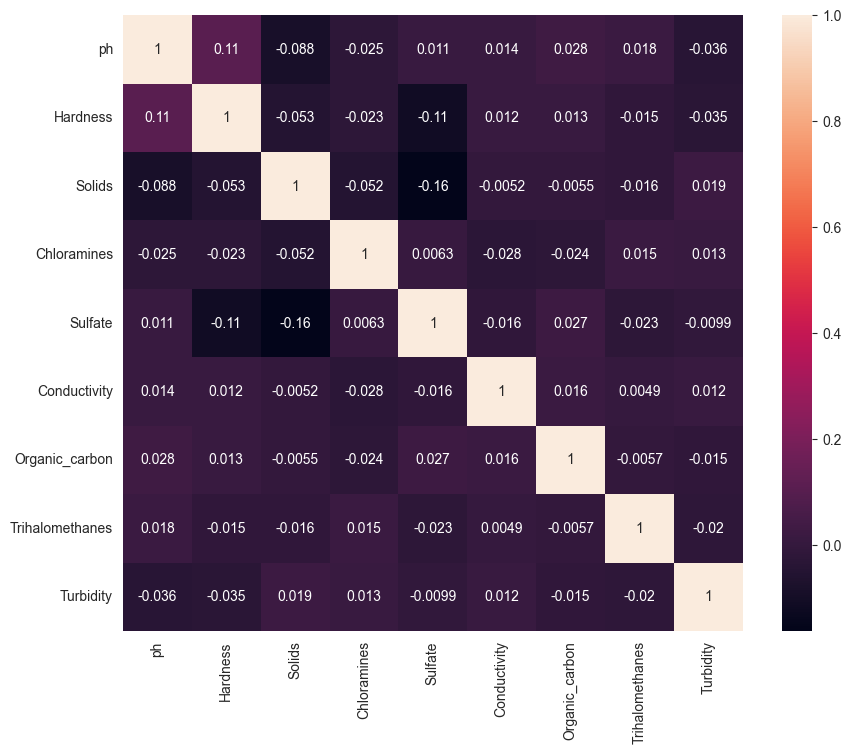

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(X.corr(), annot=True)

By the look of the heatmap, it seems that no features are highly correlated

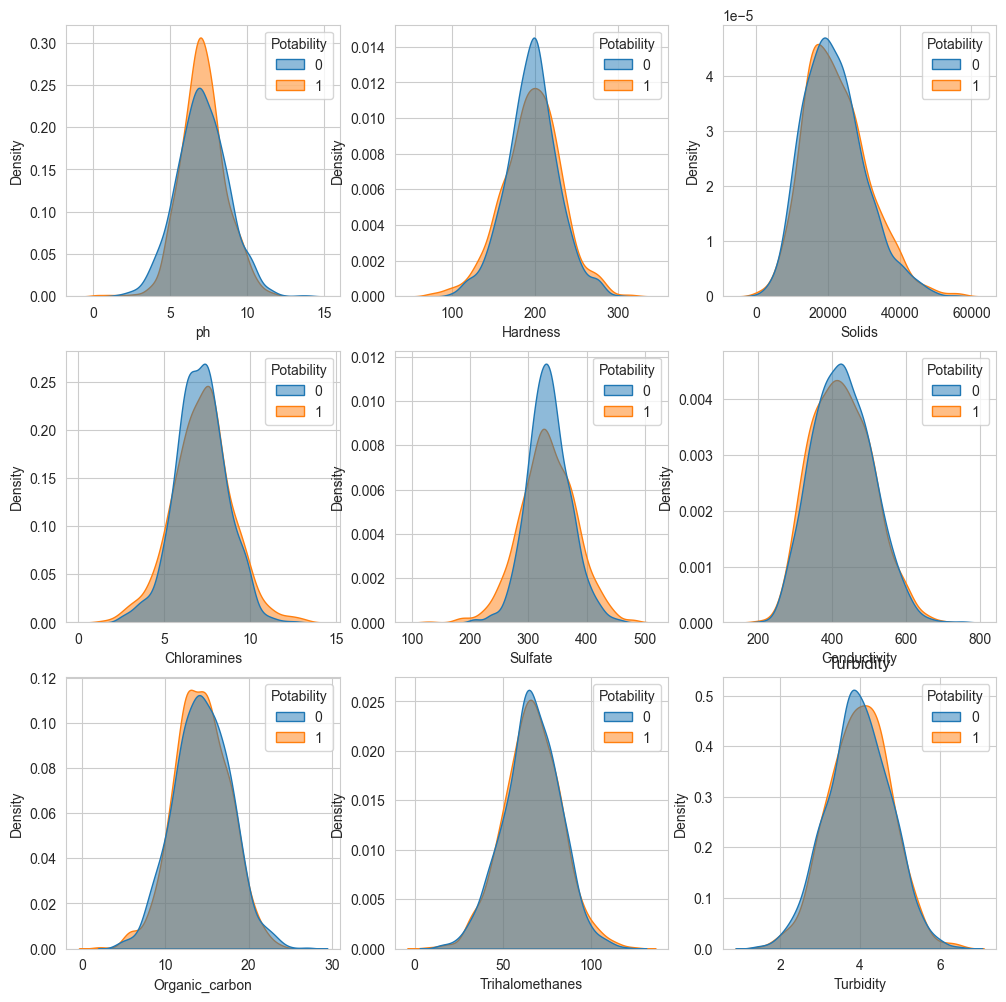

In [17]:
n_rows=3
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (12,12))
for k,col in enumerate(predictors_col):
    plt.title(col)
    sns.kdeplot(
                data=df_water,
                x=col,
                hue="Potability",
                fill=True, 
                common_norm=False,
                alpha=.5,
                linewidth=1,
                ax=axes[k//n_cols,k%n_cols]
    )

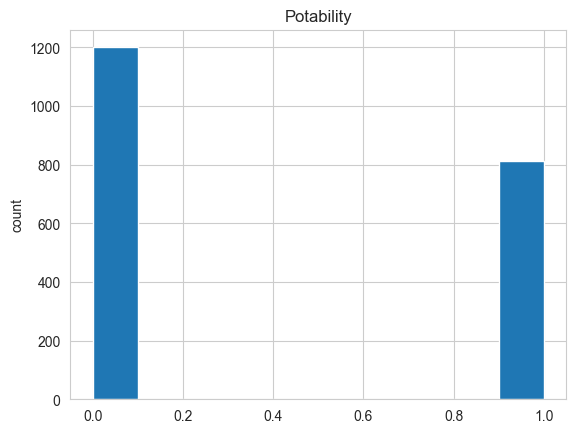

In [18]:
plt.hist(df_water.Potability)
plt.title("Potability")
plt.ylabel("count")
plt.show()

Two interesting elements : 
- It seems that no features gives any idea about the target variable 
- The target variable is kinda unbalanced between both classes but still not that much so no real bias towards one or another 

## I.5) Trying models on the dataset

Now that we have a slightly better idea of how is our dataframe, we can try to evaluate the performance of very naïve models on it. The goal of this part is not to find the best models but to see if it's interesting to invest more time on the dataset. Indeed, if all our naïve models without any feature engineering or hyperparameters tuning works perfectly on it, our dataset is way too simple to be worth our time as we won't learn much on it

Remember that our dataframe is for classification tasks, and thus we have to choose models designed for classification. So far our choice of model is the following : 
- Logistic Regression 
- Decision Trees 
- Random Forest 
- Support Vector Classifier (SVC)
- K-Nearest Neighbors (KNN) 
- Naive Bayes 
- Gradient Boosting Machine (GBM) 
- Stochastic Gradient Descent Classifier (SGD)

In [19]:
classifier_models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Support Vector Classifier" : SVC(),
    "Gaussian Naive Bayes" : GaussianNB(),
    "KNN" : KNeighborsClassifier(),
    "Gradient Boosting Classifier" : GradientBoostingClassifier(),
    "Stochastic Gradient Descent Classifier" : SGDClassifier()
}

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


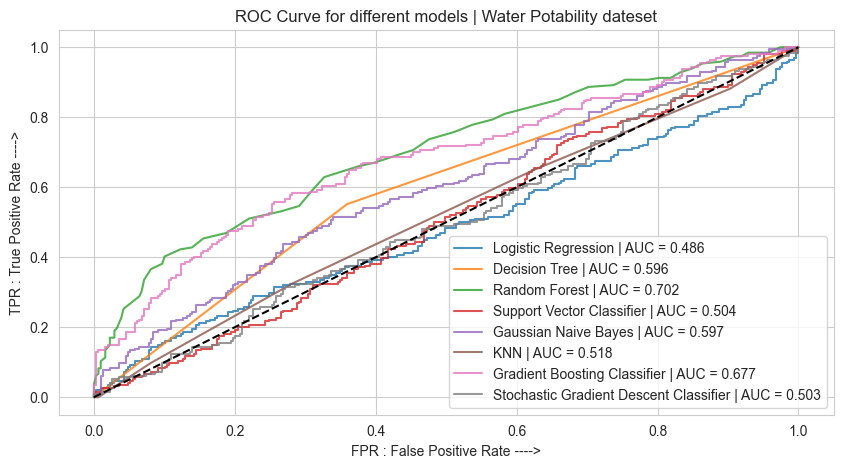

In [21]:
plt.figure(figsize = (10,5))
for model_name, model_instance in classifier_models.items():
    model = model_instance.fit(X_train, y_train)
    if hasattr(model,"decision_function"):
        y_score = model.decision_function(X_test)
    elif hasattr(model,"predict_proba"):
         y_score = model.predict_proba(X_test)[:,1]
    else:
        print("error")
        
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(
            fpr,
            tpr,
            linestyle = '-',
            label = f"{model_name} | AUC = {round(roc_auc,3)}",
            alpha = 0.8
        )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR : False Positive Rate ---->")
plt.ylabel("TPR : True Positive Rate ---->")
plt.title("ROC Curve for different models | Water Potability dateset")
plt.legend()
plt.show()

It seems that the AUC of each model is between $[ 0.4, 0.6]$ and the fact that the difference is not that huge between each model make it less interesting for us. It seems better to throw it rather than keep it and work on it. 

/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

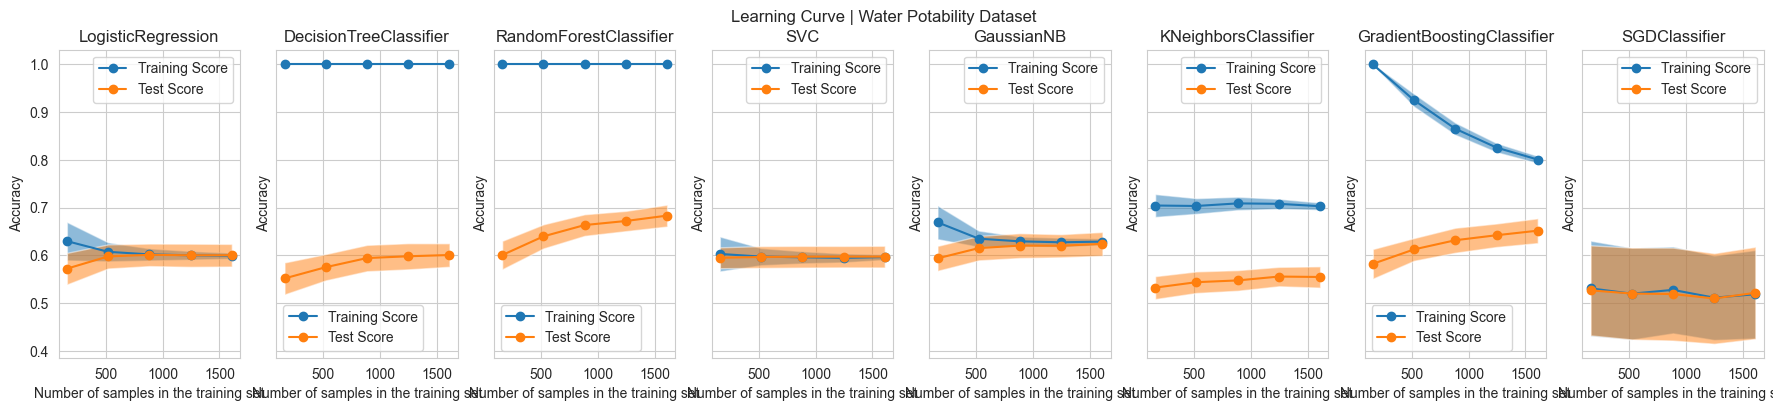

In [22]:
common_params = {
    "X" : X.values,
    "y" : y.values,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fig, ax = plt.subplots(nrows=1, ncols=len(classifier_models.keys()), figsize=(22, 4), sharey=True)
fig.suptitle("Learning Curve | Water Potability Dataset")

for ax_idx, estimator in enumerate(classifier_models.values()):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"{estimator.__class__.__name__}")

## I.6) Conclusion 

# II - The second dataset : Parkinson Telemonitoring

## II.1) A first look at the dataset

The next dataset is from UCL (https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring) 

In [23]:
df_parkinson = pd.read_csv("datasets/parkinsons_telemonitoring/parkinsons_updrs.data")

In [24]:
df_parkinson.head(10)

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   
5         1   72    0    40.6520       29.435       36.870    0.00353   
6         1   72    0    47.6490       29.682       37.363    0.00422   
7         1   72    0    54.6400       29.928       37.857    0.00476   
8         1   72    0    61.6690       30.177       38.353    0.00432   
9         1   72    0    68.6880       30.424       38.849    0.00496   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   
5     0.000023     0.00119      0.00159  ...        0.214       0.01006   
6     0.000024     0.00212      0.00221  ...        0.445       0.02376   
7     0.000025     0.00226      0.00259  ...        0.212       0.00979   
8     0.000029     0.00156      0.00207  ...        0.371       0.01774   
9     0.000027     0.00258      0.00253  ...        0.310       0.02030   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   
5       0.01337        0.02263      0.03019  0.009438  22.946  0.53949   
6       0.02621        0.03488      0.07128  0.013260  22.506  0.49250   
7       0.01462        0.01911      0.02937  0.027969  22.929  0.47712   
8       0.02134        0.03451      0.05323  0.013381  22.078  0.51563   
9       0.01970        0.02569      0.06089  0.018021  22.606  0.50032   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  
5  0.57243  0.19500  
6  0.54779  0.17563  
7  0.54234  0.23844  
8  0.61864  0.20037  
9  0.58673  0.20117  

[10 rows x 22 columns]

In [25]:
print(f"The dataset has : \n -{df_parkinson.shape[0]} rows \n -{df_parkinson.shape[1]} columns")

The dataset has : 
 -5875 rows 
 -22 columns


In [26]:
print("The columns are the following : ")
print(df_parkinson.columns.tolist())

The columns are the following : 
['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']


The dataset has a bit more data than the last one. Indeed, we have roughly 6 thousands rows for 22 features.
Same as before, we will have at best 21 predictors and 1 target variable. 
Now let's take a look at the missing values.

Another interesting thing is that in fact we won't use the feature "subject#" as it's not relevant to the problem and our target variables are : 
- motor_UPDRS
- total_UPDRS

## II.2) Missing values ?

In [27]:
(df_parkinson.isna().sum(axis = 0)/df_parkinson.shape[0] * 100).sort_values(ascending = False)

subject#         0.0
age              0.0
DFA              0.0
RPDE             0.0
HNR              0.0
NHR              0.0
Shimmer:DDA      0.0
Shimmer:APQ11    0.0
Shimmer:APQ5     0.0
Shimmer:APQ3     0.0
Shimmer(dB)      0.0
Shimmer          0.0
Jitter:DDP       0.0
Jitter:PPQ5      0.0
Jitter:RAP       0.0
Jitter(Abs)      0.0
Jitter(%)        0.0
total_UPDRS      0.0
motor_UPDRS      0.0
test_time        0.0
sex              0.0
PPE              0.0
dtype: float64

Pretty surprising, there is no missing value in this dataset. It's a good point as we won't have to clean it at least on this aspect. 

## II.3) The different datatypes : predictors and target variable

In [28]:
df_parkinson.dtypes.value_counts()

float64    19
int64       3
Name: count, dtype: int64

In [29]:
for col in df_parkinson.select_dtypes('float'):
    print(col)

test_time
motor_UPDRS
total_UPDRS
Jitter(%)
Jitter(Abs)
Jitter:RAP
Jitter:PPQ5
Jitter:DDP
Shimmer
Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
Shimmer:APQ11
Shimmer:DDA
NHR
HNR
RPDE
DFA
PPE


In [30]:
for col in df_parkinson.select_dtypes('int'):
    print(col)

subject#
age
sex


Every column represents a scalar thus there is no issue with encoding etc. we will just start by dropping the "subject#" column. 

In [31]:
df_parkinson.drop(["subject#"], axis = 1, inplace = True)

In [32]:
col_predictors = [col for col in df_parkinson.columns if (col != "total_UPDRS" and col != "motor_UPDRS")]
col_targets = ["motor_UPDRS","total_UPDRS"]
X = df_parkinson[col_predictors]
y = df_parkinson[col_targets]

In [33]:
X.head()

age  sex  test_time  Jitter(%)  Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  \
0   72    0     5.6431    0.00662     0.000034     0.00401      0.00317   
1   72    0    12.6660    0.00300     0.000017     0.00132      0.00150   
2   72    0    19.6810    0.00481     0.000025     0.00205      0.00208   
3   72    0    25.6470    0.00528     0.000027     0.00191      0.00264   
4   72    0    33.6420    0.00335     0.000020     0.00093      0.00130   

   Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0     0.01204  0.02565        0.230       0.01438       0.01309   
1     0.00395  0.02024        0.179       0.00994       0.01072   
2     0.00616  0.01675        0.181       0.00734       0.00844   
3     0.00573  0.02309        0.327       0.01106       0.01265   
4     0.00278  0.01703        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA      PPE  
0        0.01662      0.04314  0.014290  21.640  0.41888  0.54842  0.16006  
1        0.01689      0.02982  0.011112  27.183  0.43493  0.56477  0.10810  
2        0.01458      0.02202  0.020220  23.047  0.46222  0.54405  0.21014  
3        0.01963      0.03317  0.027837  24.445  0.48730  0.57794  0.33277  
4        0.01819      0.02036  0.011625  26.126  0.47188  0.56122  0.19361

In [34]:
y.head()

motor_UPDRS  total_UPDRS
0       28.199       34.398
1       28.447       34.894
2       28.695       35.389
3       28.905       35.810
4       29.187       36.375

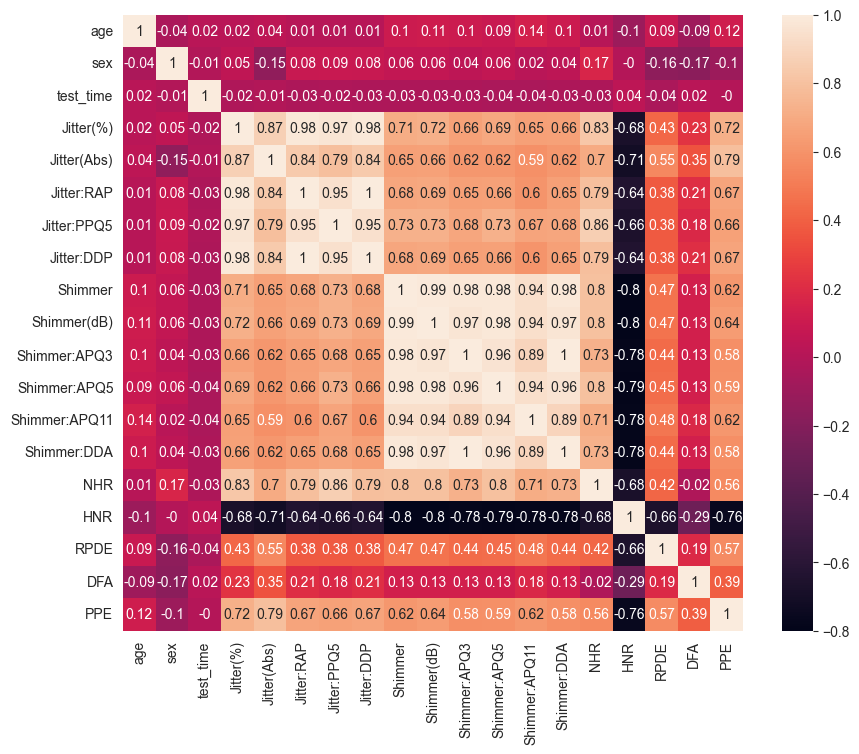

In [35]:
plt.figure(figsize = (10,8))
sns.heatmap(np.round(X.corr(),2), annot=True)
plt.show()

One can remark that many features are correlated. It seems that most of the time they share a common prefix in their name suggesting that they are indeed representing the same thing but in a different ways

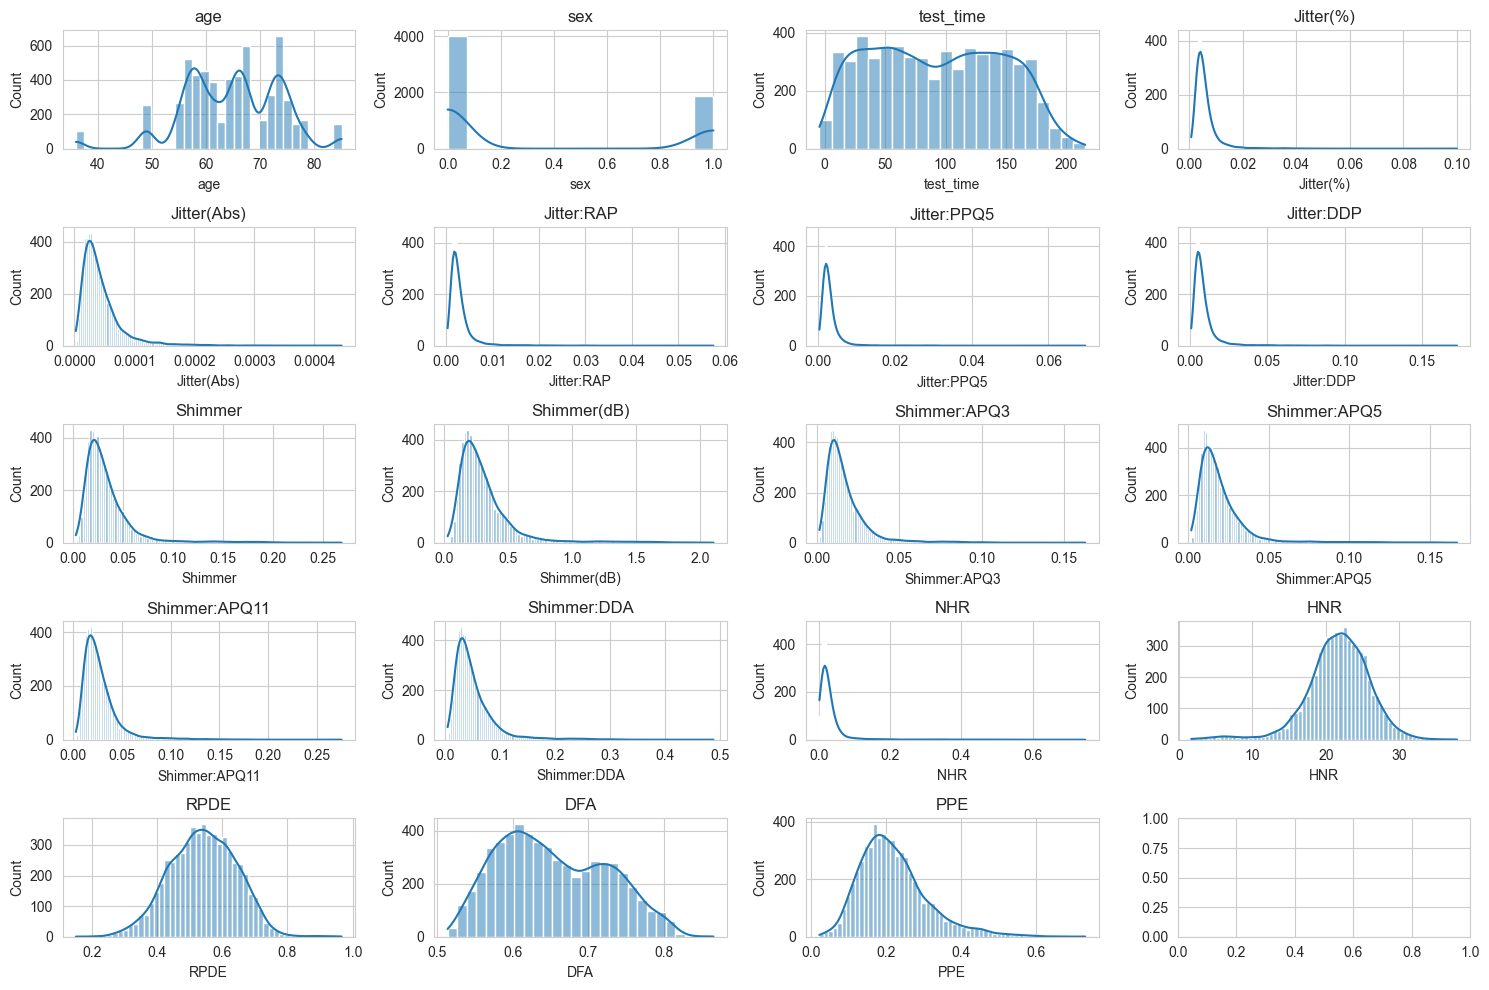

In [36]:
n_rows = 5
n_cols = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

for k, col in enumerate(col_predictors):
    sns.histplot(data=df_parkinson, 
                 x=col, 
                 fill=True,
                 kde=True,
                 alpha=.5,
                 linewidth=1,
                 ax=axes[k // n_cols, k % n_cols])
    axes[k // n_cols, k % n_cols].set_title(col)

plt.tight_layout()
plt.show()

Most of the feature seems to be normal and modal or multimodal and many seems to have a pretty big right tail 

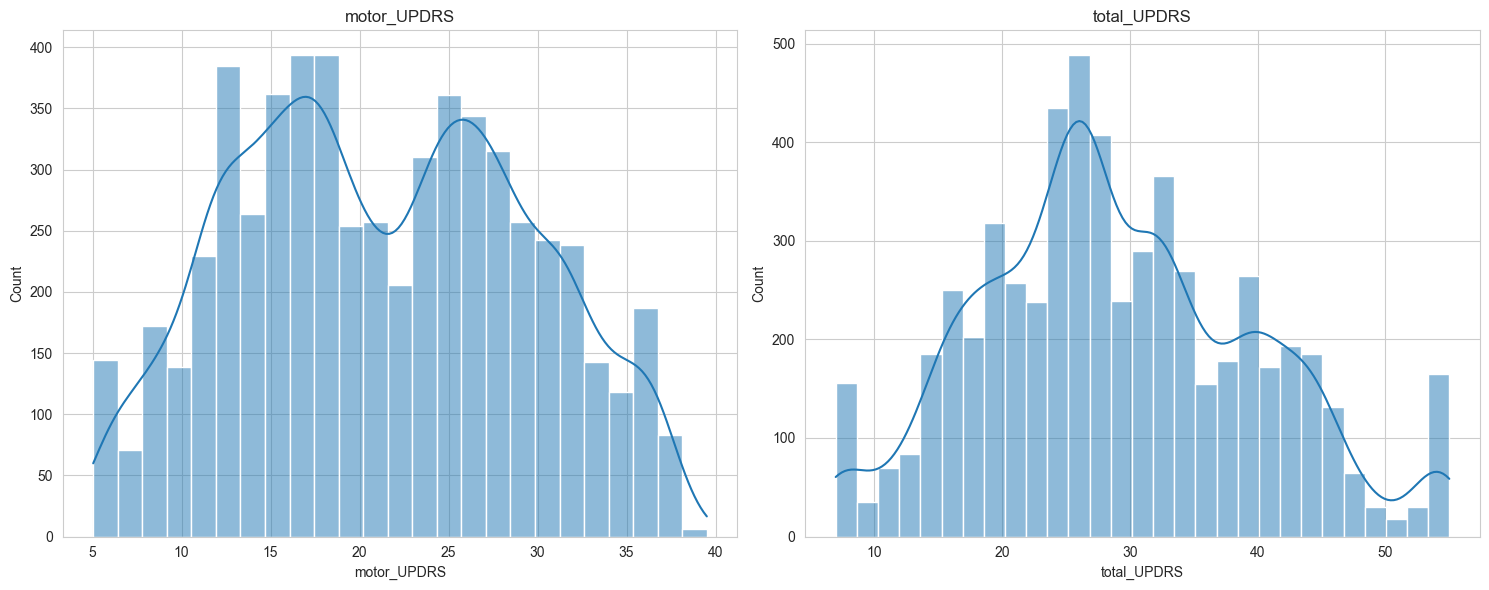

In [37]:
n_rows = 1
n_cols = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 6))

for k, col in enumerate(col_targets):
    sns.histplot(data=df_parkinson, 
                 x=col, 
                 fill=True,
                 kde=True,
                 alpha=.5,
                 linewidth=1,
                 ax=axes[k])
    axes[k].set_title(col)

plt.tight_layout()
plt.show()

## II.5) Trying models on the dataframe

Here as we wish to predict a continuous value (or two depending on the target variable we choose at the end) it's a regression problem. Therefore we will select a few machine learning regression models to see how they work on the dataset.

So far our choice of model is the following : 
- Linear Regression
- (Ridge) Linear Regression
- (Lasso) Linear Regression
- Decision Trees 
- Random Forest 
- Support Vector Regression (SVR)
- K-Nearest Neighbors (KNN)  
- Random Forest Regressor 
- Gradient Boosting Regressor 

In [38]:
regression_models = {
    "Linear Regression" : LinearRegression,
    "Ridge Linear Regression" : Ridge,
    "Lasso Linear Regression" : Lasso,
    "Decision Tree Regressor" : DecisionTreeRegressor,
    "KNN Regressor" : KNeighborsRegressor,
    "Support Vector Regression" : SVR,
    "Random Forest Regressor" : RandomForestRegressor,
    "Gradient Boosting Regressor" : GradientBoostingRegressor
}

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y["total_UPDRS"].values)

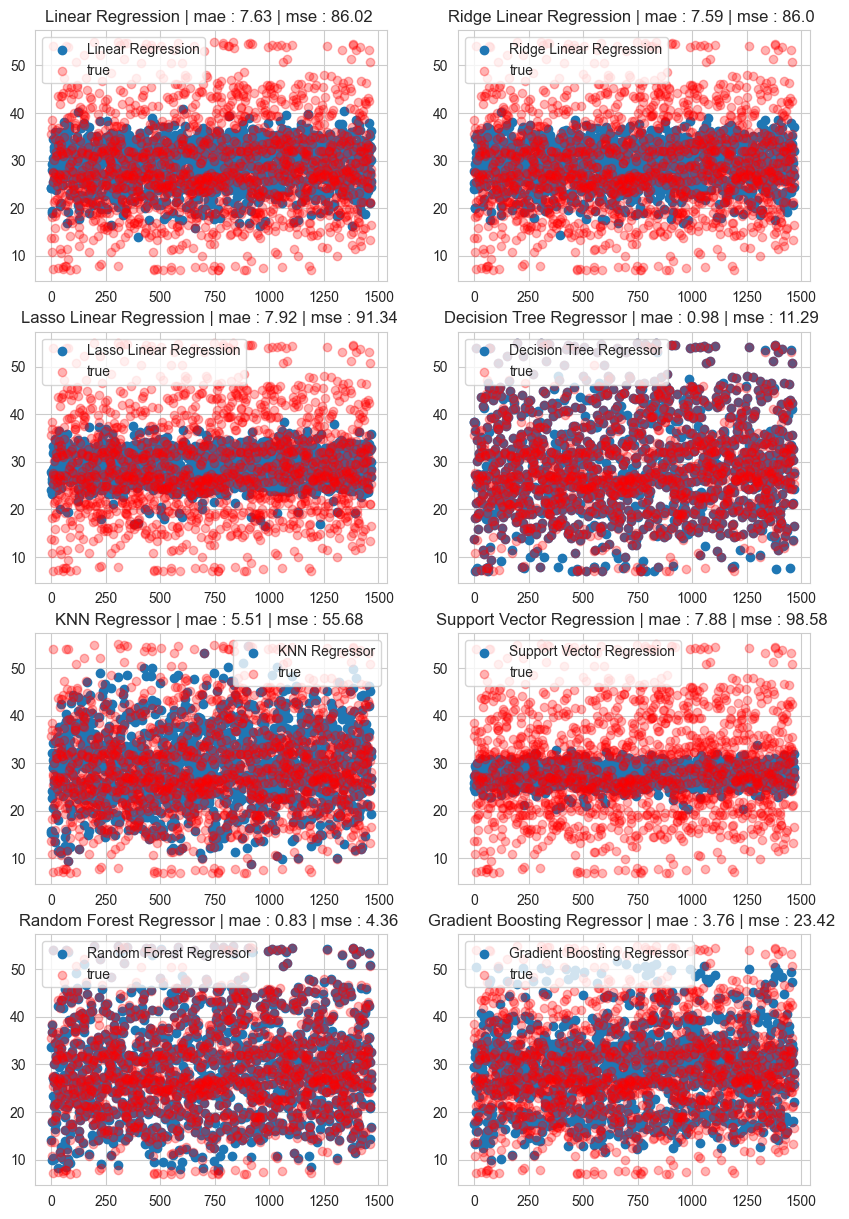

In [40]:
n_rows = 4
n_cols = 2
dic_score = {}
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 15))
k = 0

for model_name, model_constructor in regression_models.items():
    model = model_constructor().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    dic_score[model_name] = {
        "mae": mean_absolute_error(y_test, y_pred),
        "mse": mean_squared_error(y_test, y_pred)
    }
    axes[k // n_cols, k % n_cols].scatter(
        range(len(y_test)),
        y_pred,
        label=model_name)
    axes[k // n_cols, k % n_cols].set_title(f"{model_name} | mae : {round(mean_absolute_error(y_test, y_pred), 2)} | mse : {round(mean_squared_error(y_test, y_pred), 2)} ")
    axes[k // n_cols, k % n_cols].scatter(range(len(y_test)), y_test, color="red", label="true", alpha = 0.3)
    axes[k // n_cols, k % n_cols].legend()
    k += 1
    
plt.show()

df_score = pd.DataFrame(dic_score).T

In [41]:
df_score

mae        mse
Linear Regression            7.632755  86.018867
Ridge Linear Regression      7.590424  86.000868
Lasso Linear Regression      7.923720  91.343226
Decision Tree Regressor      0.983029  11.292221
KNN Regressor                5.514844  55.682725
Support Vector Regression    7.876462  98.584263
Random Forest Regressor      0.834576   4.360597
Gradient Boosting Regressor  3.758404  23.415163

## II.6) Conclusion 

It seems that our models behave differently. Therefore, it might be good to keep this dataset to work on it. Something even more interesting is that the Decision Tree and Random Forest seems to work way better than the gradient boosting.

# III - The third dataset : Housing Prices Advanced Regression Techniques

## III.1) A first look at the dataset

The following dataset has been found on kaggle : 

In [42]:
df_adv_housing = pd.read_csv("datasets/house-prices-advanced-regression-techniques/train.csv")

In [43]:
df_adv_housing.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [44]:
print(f"The dataset has : \n -{df_adv_housing.shape[0]} rows \n -{df_adv_housing.shape[1]} columns")

The dataset has : 
 -1460 rows 
 -81 columns


In [45]:
print("The columns are the following : ")
print(df_adv_housing.columns.tolist())

The columns are the following : 
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'S

We can notice that for this dataset, we have a lot of columns. Indeed, so far we have 1,5K rows and 80 columns meaning that the dimension of our space of features is pretty big and we don't have a lot of points to work on it. However we don't know if all features are relevant and if there is any missing values. Let's take a look at it 

## III.2) Missing values ?

In [46]:
(df_adv_housing.isna().sum(axis = 0)/df_adv_housing.shape[0] * 100).sort_values(ascending = False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

<Axes: >

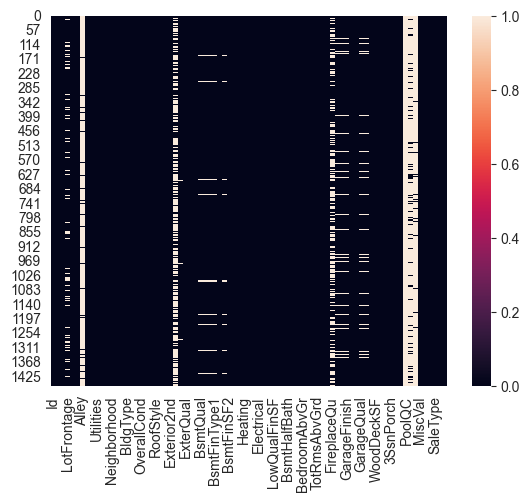

In [47]:
sns.heatmap(df_adv_housing.isna(), cbar = True)

From what we see, it seems that there is a lot of missing values in this dataset. Indeed, some columns have up to 99‰ of missing values making them worthless. The first idea is to drop the columns with at least 30‰ of missing values.   
 We will as well drop the "Id" column as it's useless for machine learning algorithms

In [48]:
col_to_drop = [col_name for col_name in df_adv_housing.isna().sum(axis=0).index.tolist() if (df_adv_housing.isna().sum(axis=0).loc[col_name]/df_adv_housing.shape[0] >= 0.3)] + ["Id"]
print(col_to_drop)

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id']


In [49]:
print(f"Before dropping some columns : {df_adv_housing.shape[1]} columns")
print(f"After dropping some columns : {df_adv_housing.drop(col_to_drop, axis = 1).shape[1]} columns")

Before dropping some columns : 81 columns
After dropping some columns : 74 columns


In [50]:
df_adv_housing.drop(col_to_drop, axis = 1, inplace = True)

In [51]:
(df_adv_housing.isna().sum(axis =1)/df_adv_housing.shape[1] * 100).sort_values(ascending = False)

39      13.513514
520     13.513514
1179    13.513514
533     13.513514
1011    13.513514
          ...    
554      0.000000
552      0.000000
551      0.000000
550      0.000000
1459     0.000000
Length: 1460, dtype: float64

In [52]:
print(f"before dropping rows : {df_adv_housing.shape[0]}")
print(f"after dropping rows : {df_adv_housing.dropna(axis = 0).shape[0]}")
print(f"The remaining percentage of rows is : {round(df_adv_housing.dropna(axis = 0).shape[0]/df_adv_housing.shape[0],3)}")

before dropping rows : 1460
after dropping rows : 1094
The remaining percentage of rows is : 0.749


So far we have dropped some columns and some rows. Our idea was that some columns where usable due to the large number of missing values and as we don't want to do any preprocessing so far, we as well decided to see the worst case scenario where we would drop as well the rows with missing values

In [53]:
df_adv_housing.dropna(axis = 0, inplace = True)

## III.3) The different datatypes : predictors and target variable

In [54]:
df_adv_housing.dtypes.value_counts()

object     37
int64      34
float64     3
Name: count, dtype: int64

In [55]:
continuous_variables = [col for col in df_adv_housing.select_dtypes(["float"])]
discrete_variables = [col for col in df_adv_housing.select_dtypes(["int"])]
categorical_variables = [col for col in df_adv_housing.select_dtypes(["object"])]

In [56]:
print("continuous variables")
print(continuous_variables)
print("----------------------------------------")
print("discrete variables")
print(discrete_variables)
print("----------------------------------------")
print("categorical variables")
print(categorical_variables)

continuous variables
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
----------------------------------------
discrete variables
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
----------------------------------------
categorical variables
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Hea

## III.4) Relationship between the predictors and the target variable

<Axes: >

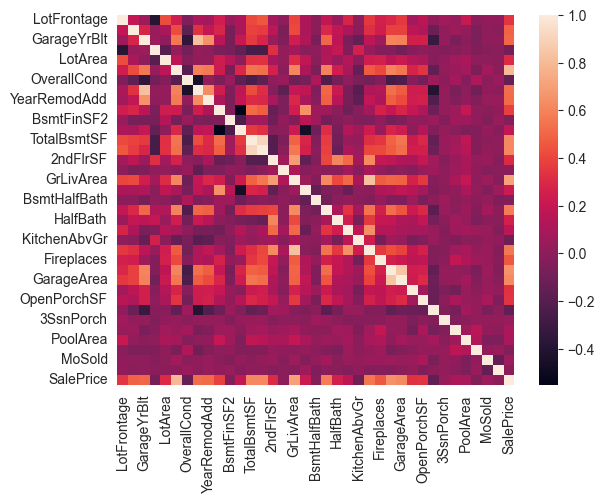

In [57]:
sns.heatmap(df_adv_housing[continuous_variables + discrete_variables].corr())

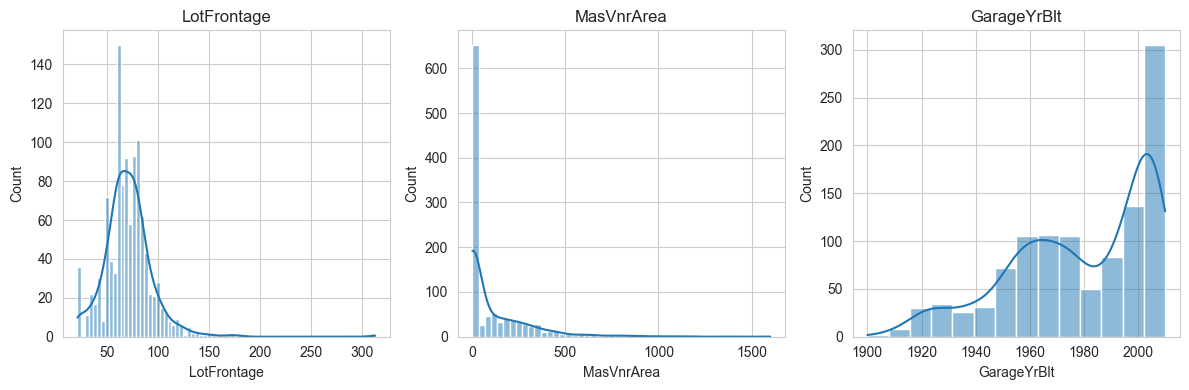

In [58]:
n_row = 1
n_col = 3 
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(12, 4))
for k, col in enumerate(continuous_variables):
    sns.histplot(data=df_adv_housing, 
                 x=col, 
                 fill=True,
                 kde=True,
                 alpha=.5,
                 linewidth=1,
                 ax=axes[k])
    axes[k].set_title(col)
    
plt.tight_layout()
plt.show()

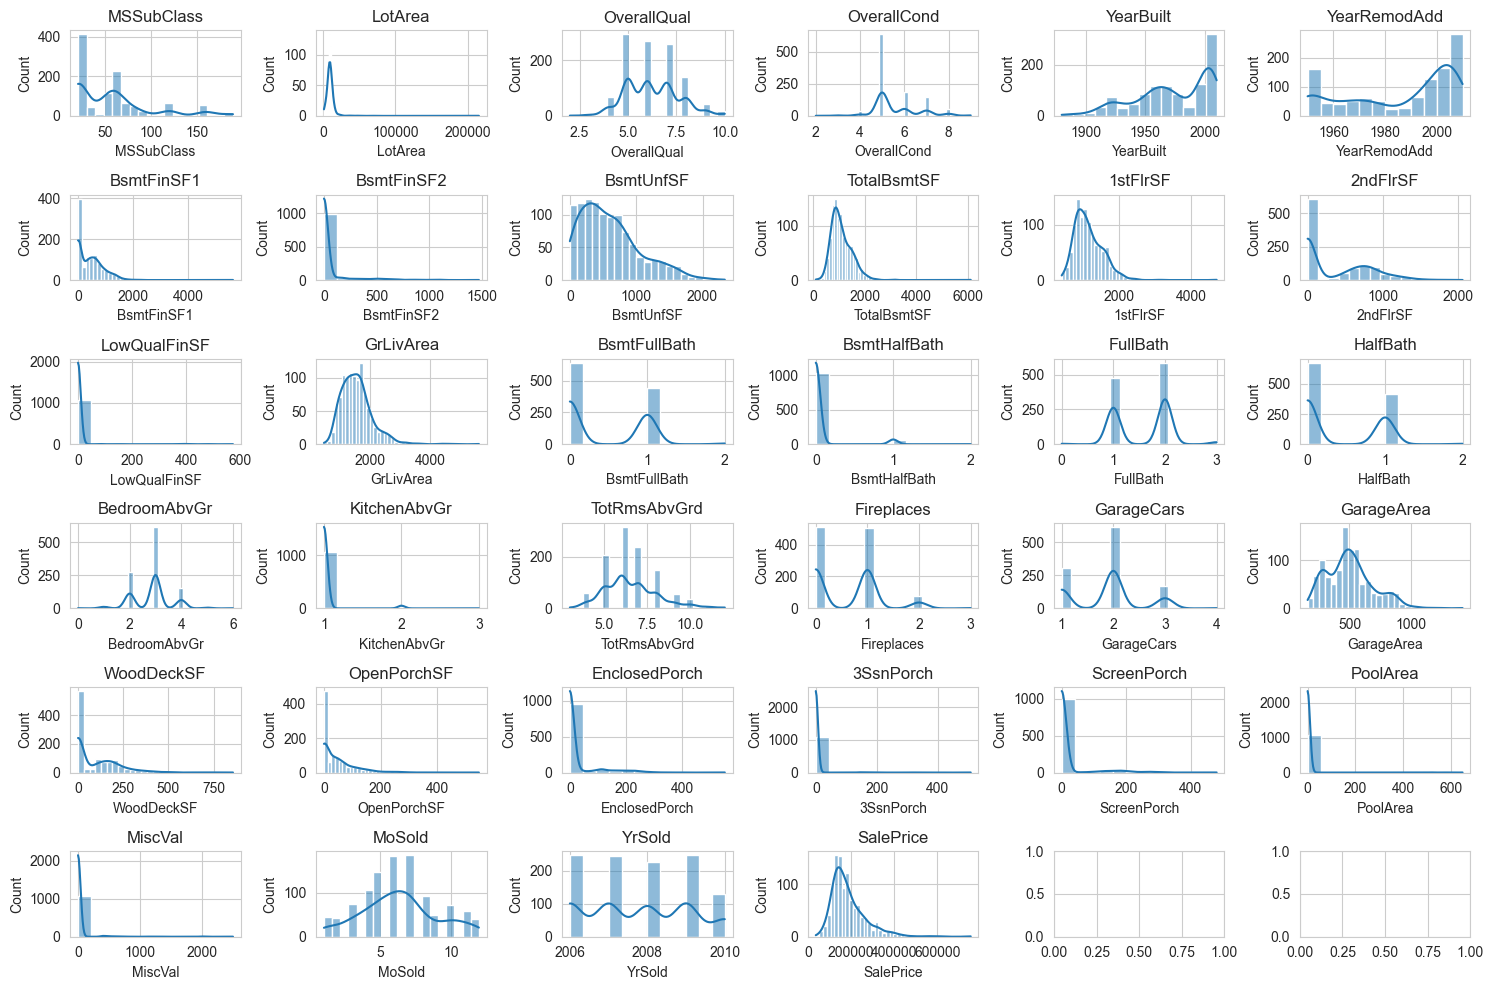

In [59]:
n_rows = 6
n_cols = 6 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

for k, col in enumerate(discrete_variables):
    sns.histplot(data=df_adv_housing, 
                 x=col, 
                 fill=True,
                 kde=True,
                 alpha=.5,
                 linewidth=1,
                 ax=axes[k // n_cols, k % n_cols])
    axes[k // n_cols, k % n_cols].set_title(col)

plt.tight_layout()
plt.show()

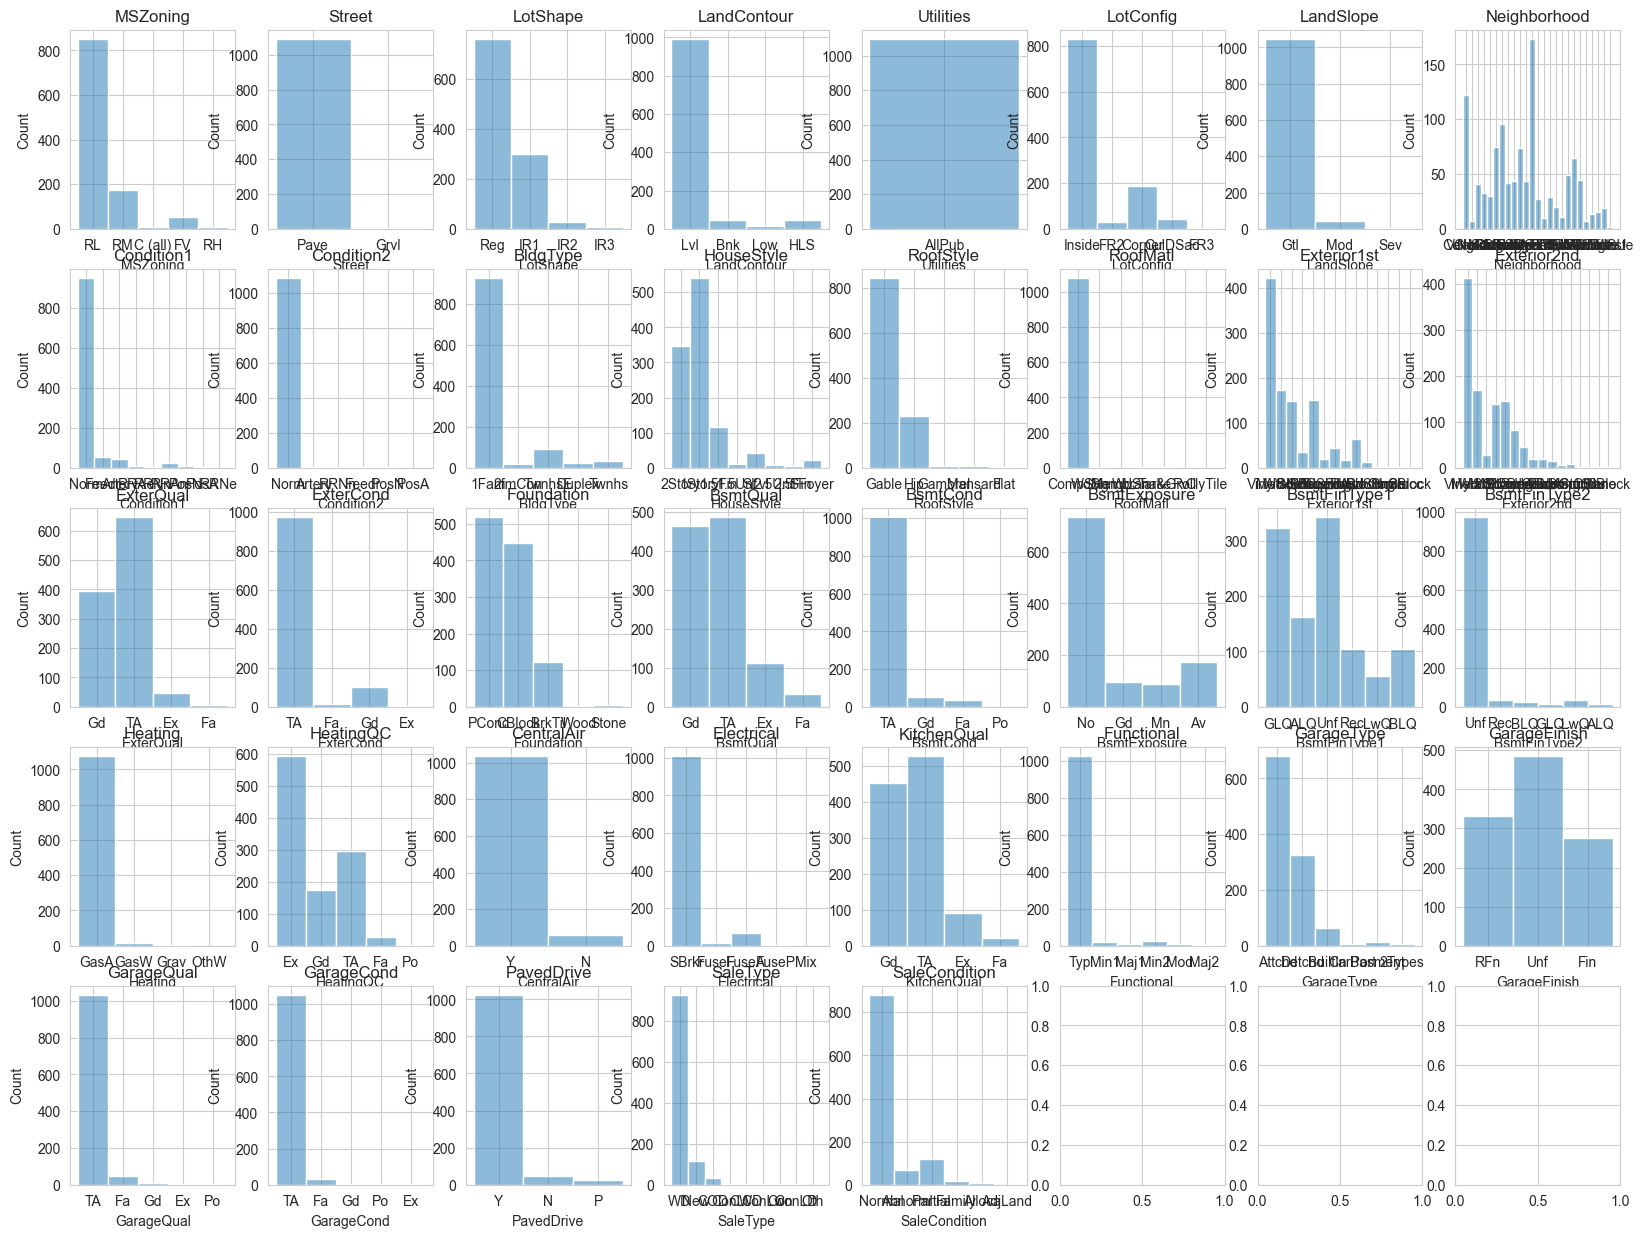

In [60]:
n_rows = 5
n_cols = 8 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))

for k, col in enumerate(categorical_variables):
    sns.histplot(data=df_adv_housing, 
                 x=col, 
                 fill=True,
                 alpha=.5,
                 linewidth=1,
                 ax=axes[k // n_cols, k % n_cols])
    axes[k // n_cols, k % n_cols].set_title(col)

plt.show()

## III.5) Trying models on the dataset

For the model initial predicitons, we will use the models we choose earlier. As there is a lot of categorical values, we will deal with it in three parts : 
- first one : we will drop them and evaluate the models on it 
- we will one-hot encode them and evaluate the models on it
- We will try models who can naturally handle categorical values

### I.5.1) Trying models and dropping categorical features

In [61]:
df_adv_housing_drop = df_adv_housing.drop(categorical_variables, axis = 1)

In [62]:
X, y = df_adv_housing_drop[[col for col in df_adv_housing_drop.columns.tolist() if col != 'SalePrice']], df_adv_housing_drop['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

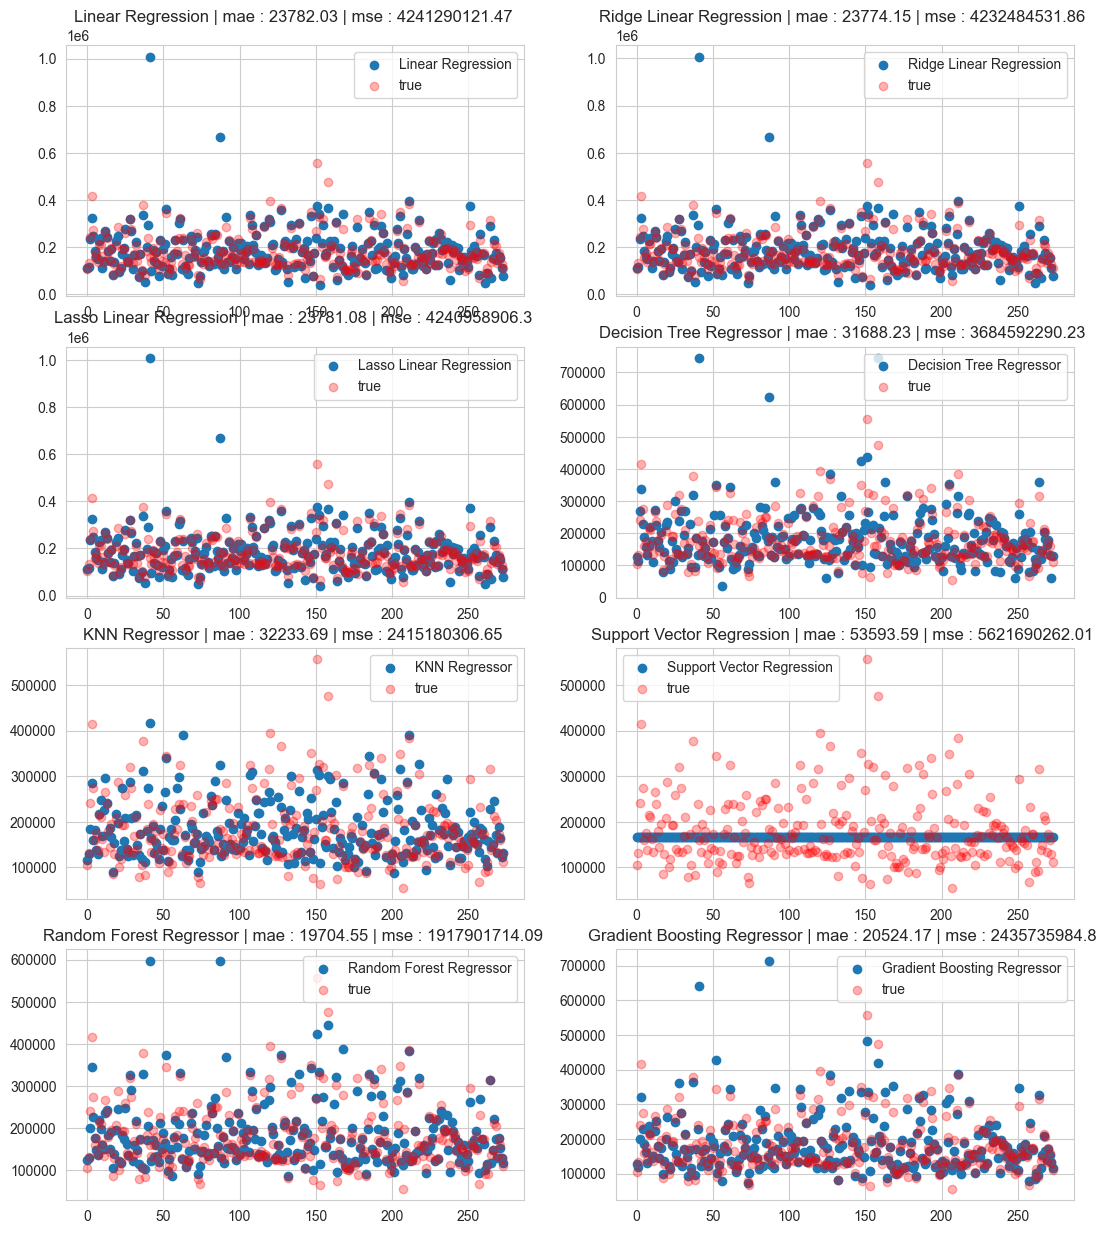

In [63]:
n_rows = 4
n_cols = 2
dic_score = {}
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(13, 15))
k = 0

for model_name, model_constructor in regression_models.items():
    model = model_constructor().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    dic_score[model_name] = {
        "mae": mean_absolute_error(y_test, y_pred),
        "mse": mean_squared_error(y_test, y_pred)
    }
    axes[k // n_cols, k % n_cols].scatter(
        range(len(y_test)),
        y_pred,
        label=model_name)
    axes[k // n_cols, k % n_cols].set_title(f"{model_name} | mae : {round(mean_absolute_error(y_test, y_pred), 2)} | mse : {round(mean_squared_error(y_test, y_pred), 2)} ")
    axes[k // n_cols, k % n_cols].scatter(range(len(y_test)), y_test, color="red", label="true", alpha = 0.3)
    axes[k // n_cols, k % n_cols].legend()
    k += 1
    
plt.show()

df_score_drop = pd.DataFrame(dic_score).T

In [64]:
df_score

mae        mse
Linear Regression            7.632755  86.018867
Ridge Linear Regression      7.590424  86.000868
Lasso Linear Regression      7.923720  91.343226
Decision Tree Regressor      0.983029  11.292221
KNN Regressor                5.514844  55.682725
Support Vector Regression    7.876462  98.584263
Random Forest Regressor      0.834576   4.360597
Gradient Boosting Regressor  3.758404  23.415163

### I.5.2) Trying models and using one hot encoding on categorical features

Now we can try a second way using a simple one hot encoding 

In [65]:
df_adv_one_hot = df_adv_housing.copy(deep=True)
categorical_variables = [col for col in df_adv_one_hot.select_dtypes(["object"])]

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_adv_one_hot[categorical_variables])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_variables))

one_hot_df.reset_index(drop=True, inplace=True)
df_adv_one_hot.reset_index(drop=True, inplace=True)

df_adv_one_hot = pd.concat([df_adv_one_hot, one_hot_df], axis=1)
df_adv_one_hot.drop(categorical_variables, axis=1, inplace=True)

In [66]:
print(f"shape before one hot : {df_adv_housing.shape}")
print(f"shape after one hot : {df_adv_one_hot.shape}")

shape before one hot : (1094, 74)
shape after one hot : (1094, 256)


In [67]:
X, y = df_adv_one_hot[[col for col in df_adv_one_hot.columns.tolist() if col != 'SalePrice']], df_adv_one_hot['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+11, tolerance: 5.532e+08
  model = cd_fast.enet_coordinate_descent(


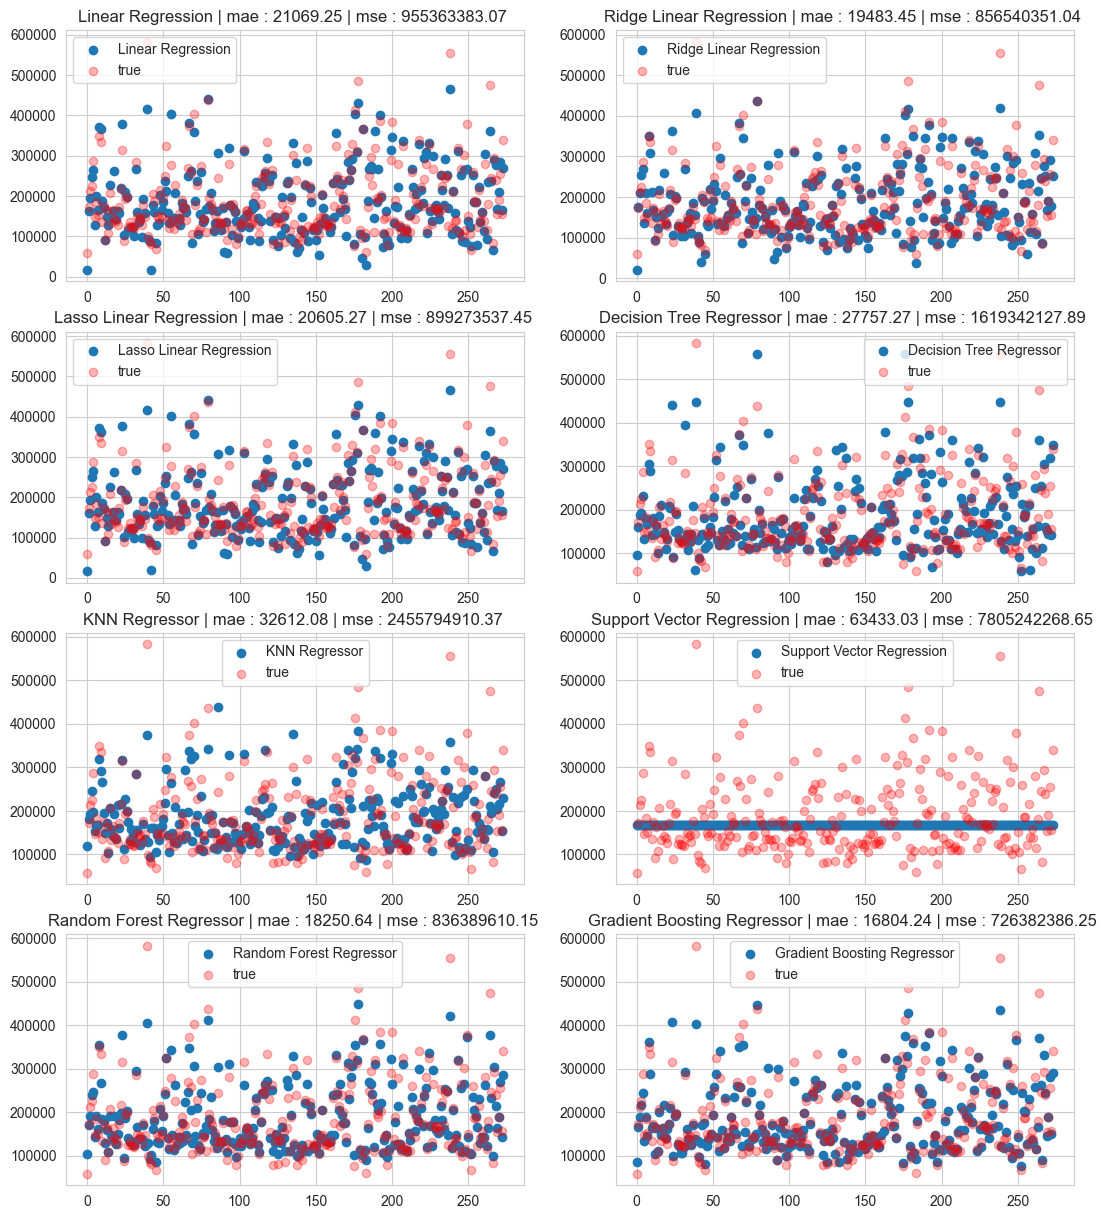

In [68]:
n_rows = 4
n_cols = 2
dic_score = {}
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(13, 15))
k = 0

for model_name, model_constructor in regression_models.items():
    model = model_constructor().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    dic_score[model_name] = {
        "mae": mean_absolute_error(y_test, y_pred),
        "mse": mean_squared_error(y_test, y_pred)
    }
    axes[k // n_cols, k % n_cols].scatter(
        range(len(y_test)),
        y_pred,
        label=model_name)
    axes[k // n_cols, k % n_cols].set_title(f"{model_name} | mae : {round(mean_absolute_error(y_test, y_pred), 2)} | mse : {round(mean_squared_error(y_test, y_pred), 2)} ")
    axes[k // n_cols, k % n_cols].scatter(range(len(y_test)), y_test, color="red", label="true", alpha = 0.3)
    axes[k // n_cols, k % n_cols].legend()
    k += 1
    
plt.show()

df_score_one_hot = pd.DataFrame(dic_score).T

In [69]:
df_score

mae        mse
Linear Regression            7.632755  86.018867
Ridge Linear Regression      7.590424  86.000868
Lasso Linear Regression      7.923720  91.343226
Decision Tree Regressor      0.983029  11.292221
KNN Regressor                5.514844  55.682725
Support Vector Regression    7.876462  98.584263
Random Forest Regressor      0.834576   4.360597
Gradient Boosting Regressor  3.758404  23.415163

In [70]:
df_score_all = pd.concat([df_score_drop.add_suffix("_drop"),df_score_one_hot.add_suffix("_one_hot")], axis=1)
prefix_to_order_by = 'mae_'
sorted_columns = sorted(df_score_all.columns, key=lambda x: x if x.startswith(prefix_to_order_by) else '')

df_score_all = df_score_all[sorted_columns]


In [71]:
df_score_all

mse_drop   mse_one_hot      mae_drop  \
Linear Regression            4.241290e+09  9.553634e+08  23782.025994   
Ridge Linear Regression      4.232485e+09  8.565404e+08  23774.150325   
Lasso Linear Regression      4.240959e+09  8.992735e+08  23781.076847   
Decision Tree Regressor      3.684592e+09  1.619342e+09  31688.233577   
KNN Regressor                2.415180e+09  2.455795e+09  32233.688321   
Support Vector Regression    5.621690e+09  7.805242e+09  53593.589799   
Random Forest Regressor      1.917902e+09  8.363896e+08  19704.550438   
Gradient Boosting Regressor  2.435736e+09  7.263824e+08  20524.171814   

                              mae_one_hot  
Linear Regression            21069.253812  
Ridge Linear Regression      19483.453883  
Lasso Linear Regression      20605.266491  
Decision Tree Regressor      27757.270073  
KNN Regressor                32612.083212  
Support Vector Regression    63433.032948  
Random Forest Regressor      18250.644416  
Gradient Boosting Regressor  16804.238068

Even thought we increased the dimension of the space of the features by one hot encoding the categorical features, it seems that this simple trick decreased the error of the models.

## III.6) Conclusion

# IV - The fourth dataset : Heart Attach

## IV.1) A first look at the dataset

This dataset has been found on Kaggle : "https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv"

In [72]:
df_heart = pd.read_csv('datasets/heart_attack/heart.csv')

In [73]:
df_heart.head(10)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   
5   57    1   0     140   192    0        1       148     0      0.4    1   
6   56    0   1     140   294    0        0       153     0      1.3    1   
7   44    1   1     120   263    0        1       173     0      0.0    2   
8   52    1   2     172   199    1        1       162     0      0.5    2   
9   57    1   2     150   168    0        1       174     0      1.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
5    0      1       1  
6    0      2       1  
7    0      3       1  
8    0      3       1  
9    0      2       1

In [74]:
print(f"The dataset has : \n -{df_heart.shape[0]} rows \n -{df_heart.shape[1]} columns")

The dataset has : 
 -303 rows 
 -14 columns


In [75]:
print("The columns are the following : ")
print(df_heart.columns.tolist())

The columns are the following : 
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


The dataset is the smallest we encountered so far. with 300 instances and 14 columns (13 predictors and 1 target variable)

## IV.2) Missing values ?

In [76]:
(df_heart.isna().sum(axis = 0)/df_heart.shape[0] * 100).sort_values(ascending = False)

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

There is no missing value

## IV.3) The different datatypes : predictors and target variable

In [77]:
df_heart.dtypes.value_counts()

int64      13
float64     1
Name: count, dtype: int64

In [78]:
for col in df_heart.select_dtypes('int'):
    print(col)

age
sex
cp
trtbps
chol
fbs
restecg
thalachh
exng
slp
caa
thall
output


In [79]:
df_heart.sex.unique()

array([1, 0])

In [80]:
for col in df_heart.select_dtypes('float'):
    print(col)

oldpeak


In [81]:
print(df_heart.output.unique())

[1 0]


it seems that the "sex" feature as already been encoded in 0-1 to refers to each sex 

## IV.4) Relationship between the predictors and the target variable

In [82]:
predictors_col = [col for col in df_heart.columns if col != 'output']
target_variable = 'output'

In [83]:
X = df_heart[predictors_col]
y = df_heart[target_variable]

In [84]:
X.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2

In [85]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

<Axes: >

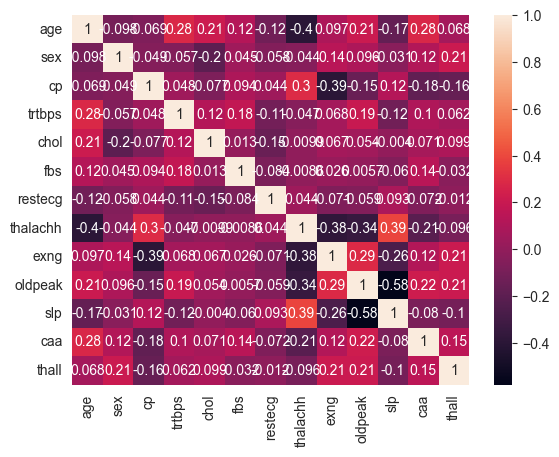

In [86]:
sns.heatmap(X.corr(), annot=True)

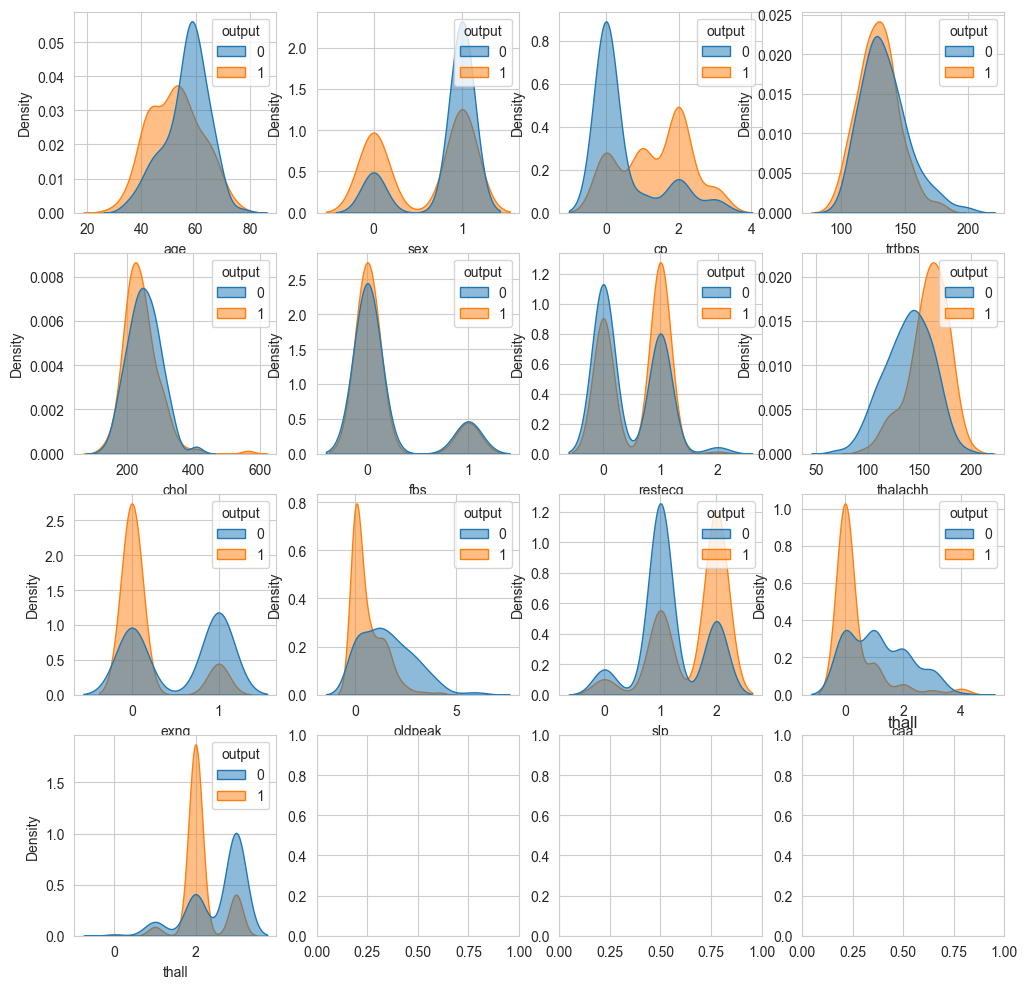

In [87]:
n_rows=4
n_cols=4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (12,12))
for k,col in enumerate(predictors_col):
    plt.title(col)
    sns.kdeplot(
                data=df_heart,
                x=col,
                hue=target_variable,
                fill=True, 
                common_norm=False,
                alpha=.5,
                linewidth=1,
                ax=axes[k//n_cols,k%n_cols]
    )

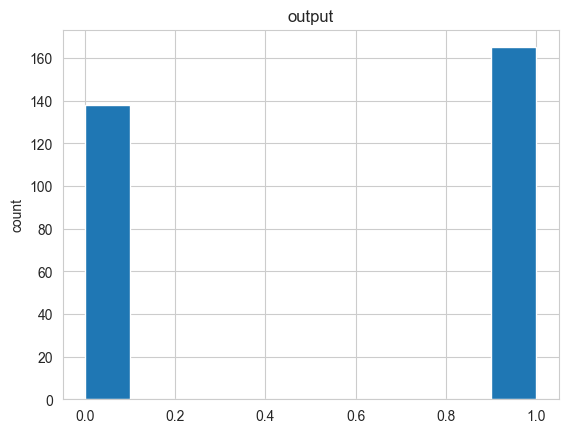

In [88]:
plt.hist(df_heart.output)
plt.title("output")
plt.ylabel("count")
plt.show()

Something interesting we can see is that even thought the classes are pretty balanced, it seems that nearly each predictor has a different distribution with respect to the output values

## IV.5) Trying models on the dataset

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


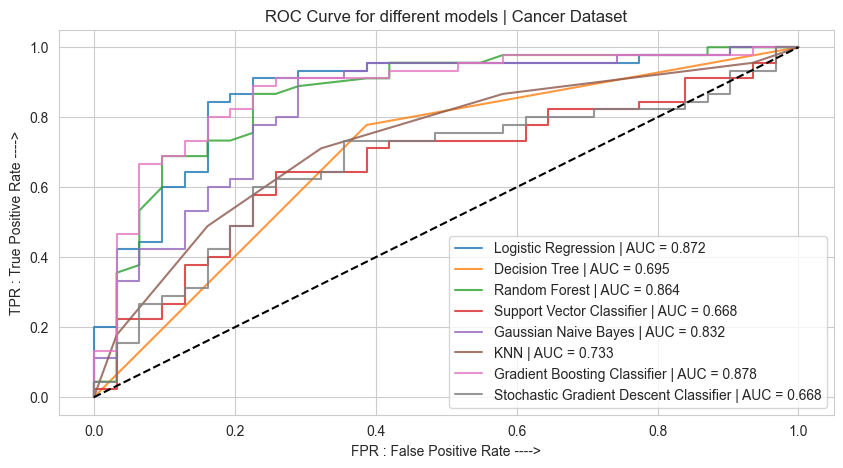

In [90]:
plt.figure(figsize = (10,5))
for model_name, model_constructor in classifier_models.items():
    model = model_constructor.fit(X_train, y_train)
    if hasattr(model,"decision_function"):
        y_score = model.decision_function(X_test)
    elif hasattr(model,"predict_proba"):
         y_score = model.predict_proba(X_test)[:,1]
    else:
        print("error")
        
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(
            fpr,
            tpr,
            linestyle = '-',
            label = f"{model_name} | AUC = {round(roc_auc,3)}",
            alpha = 0.8
        )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR : False Positive Rate ---->")
plt.ylabel("TPR : True Positive Rate ---->")
plt.title("ROC Curve for different models | Cancer Dataset")
plt.legend()
plt.show()

/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

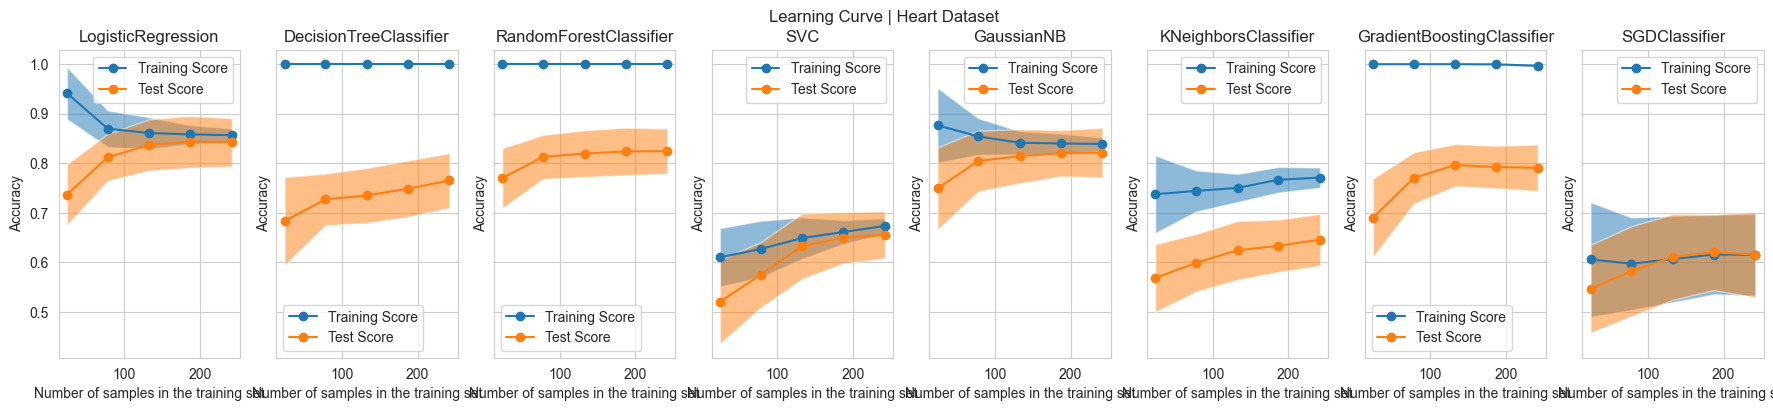

In [91]:
common_params = {
    "X" : X.values,
    "y" : y.values,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fig, ax = plt.subplots(nrows=1, ncols=len(classifier_models.keys()), figsize=(22, 4), sharey=True)
fig.suptitle("Learning Curve | Heart Dataset")

for ax_idx, estimator in enumerate(classifier_models.values()):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"{estimator.__class__.__name__}")

Something interesting here is that :
- There is a real difference in performance between each model
- a simple logistic regression is better than every other models which are by far more complex
However every score is pretty high whether no tuning has been done which means that there is not a lot of room for improvement. Therefore, we will drop this dataset

# V - The fifth dataset : rain in Australia

## V.1) A first look at the dataset

The following dataset has been found on Kaggle : "https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package"

In [92]:
df_rain = pd.read_csv("datasets/rain_in_australia/weatherAUS.csv")

In [93]:
df_rain.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   
5         WNW           56.0          W  ...        55.0         23.0   
6           W           50.0         SW  ...        49.0         19.0   
7           W           35.0        SSE  ...        48.0         19.0   
8         NNW           80.0         SE  ...        42.0          9.0   
9           W           28.0          S  ...        58.0         27.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
5       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
6       1009.6       1008.2       1.0       NaN     18.1     24.6         No   
7       1013.4       1010.1       NaN       NaN     16.3     25.5         No   
8       1008.9       1003.6       NaN       NaN     18.3     30.2         No   
9       1007.0       1005.7       NaN       NaN     20.1     28.2        Yes   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 23 columns]

In [94]:
print(f"The dataset has : \n -{df_rain.shape[0]} rows \n -{df_rain.shape[1]} columns")

The dataset has : 
 -145460 rows 
 -23 columns


In [95]:
print("The columns are the following : ")
print(df_rain.columns.tolist())

The columns are the following : 
['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


## V.2) Missing values ?

In [96]:
(df_rain.isna().sum(axis = 0)/df_rain.shape[0] * 100).sort_values(ascending = False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

<Axes: >

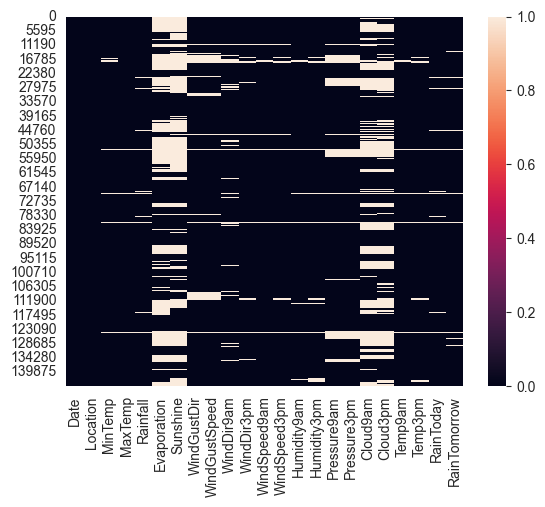

In [97]:
sns.heatmap(df_rain.isna(), cbar = True)

In [98]:
df_rain.dropna(axis = 0, inplace = True)

## V.3) The different datatypes : predictors and target variable

In [99]:
df_rain.dtypes.value_counts()

float64    16
object      7
Name: count, dtype: int64

In [100]:
for col in df_rain.select_dtypes('float'):
    print(col)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm


In [101]:
for col in df_rain.select_dtypes('object'):
    print(col)

Date
Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


In [102]:
print(df_rain["Date"].unique())

['2009-01-01' '2009-01-02' '2009-01-04' ... '2016-07-08' '2016-06-04'
 '2016-06-05']


In [103]:
print(df_rain["Location"].unique())

['Cobar' 'CoffsHarbour' 'Moree' 'NorfolkIsland' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Canberra' 'Sale' 'MelbourneAirport'
 'Melbourne' 'Mildura' 'Portland' 'Watsonia' 'Brisbane' 'Cairns'
 'Townsville' 'MountGambier' 'Nuriootpa' 'Woomera' 'PerthAirport' 'Perth'
 'Hobart' 'AliceSprings' 'Darwin']


In [104]:
print(df_rain["RainToday"].unique())

['No' 'Yes']


In [105]:
print(df_rain["RainTomorrow"].unique())

['No' 'Yes']


In [106]:
print(df_rain["WindDir3pm"].unique())

['SW' 'SSE' 'NNW' 'WSW' 'WNW' 'S' 'ENE' 'N' 'SE' 'NNE' 'NW' 'E' 'ESE' 'NE'
 'SSW' 'W']


First of all we can see that for some categorical features, we will have to map the values from "yes" and "no" to "1" and "0". 

In [107]:
df_rain.replace({'No': 0, 'Yes': 1}, inplace=True)
df_rain = df_rain.astype({"RainTomorrow": 'int64', "RainToday": 'int64'})

/var/folders/p0/f7nf1bpx6y1_wz00m_xt743w0000gn/T/ipykernel_10051/1999323666.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rain.replace({'No': 0, 'Yes': 1}, inplace=True)


In [108]:
df_rain

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    2009-01-01    Cobar     17.9     35.2       0.0         12.0   
6050    2009-01-02    Cobar     18.4     28.9       0.0         14.8   
6052    2009-01-04    Cobar     19.4     37.6       0.0         10.8   
6053    2009-01-05    Cobar     21.9     38.4       0.0         11.4   
6054    2009-01-06    Cobar     24.2     41.0       0.0         11.2   
...            ...      ...      ...      ...       ...          ...   
142298  2017-06-20   Darwin     19.3     33.4       0.0          6.0   
142299  2017-06-21   Darwin     21.2     32.6       0.0          7.6   
142300  2017-06-22   Darwin     20.7     32.8       0.0          5.6   
142301  2017-06-23   Darwin     19.5     31.8       0.0          6.2   
142302  2017-06-24   Darwin     20.2     31.7       0.0          5.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
6049        12.3         SSW           48.0        ENE  ...        20.0   
6050        13.0           S           37.0        SSE  ...        30.0   
6052        10.6         NNE           46.0        NNE  ...        42.0   
6053        12.2         WNW           31.0        WNW  ...        37.0   
6054         8.4         WNW           35.0         NW  ...        19.0   
...          ...         ...            ...        ...  ...         ...   
142298      11.0         ENE           35.0         SE  ...        63.0   
142299       8.6           E           37.0         SE  ...        56.0   
142300      11.0           E           33.0          E  ...        46.0   
142301      10.6         ESE           26.0         SE  ...        62.0   
142302      10.7         ENE           30.0        ENE  ...        73.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
6049           13.0       1006.3       1004.4       2.0       5.0     26.6   
6050            8.0       1012.9       1012.1       1.0       1.0     20.3   
6052           22.0       1012.3       1009.2       1.0       6.0     28.7   
6053           22.0       1012.7       1009.1       1.0       5.0     29.1   
6054           15.0       1010.7       1007.4       1.0       6.0     33.6   
...             ...          ...          ...       ...       ...      ...   
142298         32.0       1013.9       1010.5       0.0       1.0     24.5   
142299         28.0       1014.6       1011.2       7.0       0.0     24.8   
142300         23.0       1015.3       1011.8       0.0       0.0     24.8   
142301         58.0       1014.9       1010.7       1.0       1.0     24.8   
142302         32.0       1013.9       1009.7       6.0       5.0     25.4   

        Temp3pm  RainToday  RainTomorrow  
6049       33.4          0             0  
6050       27.0          0             0  
6052       34.9          0             0  
6053       35.6          0             0  
6054       37.6          0             0  
...         ...        ...           ...  
142298     32.3          0             0  
142299     32.0          0             0  
142300     32.1          0             0  
142301     29.2          0             0  
142302     31.0          0             0  

[56420 rows x 23 columns]

In [109]:
col_to_drop = [col for col in df_rain.select_dtypes(["object"])]
df_rain.drop(col_to_drop, axis = 1, inplace = True)

## V.4) Relationship between the predictors and the target variable

<Axes: >

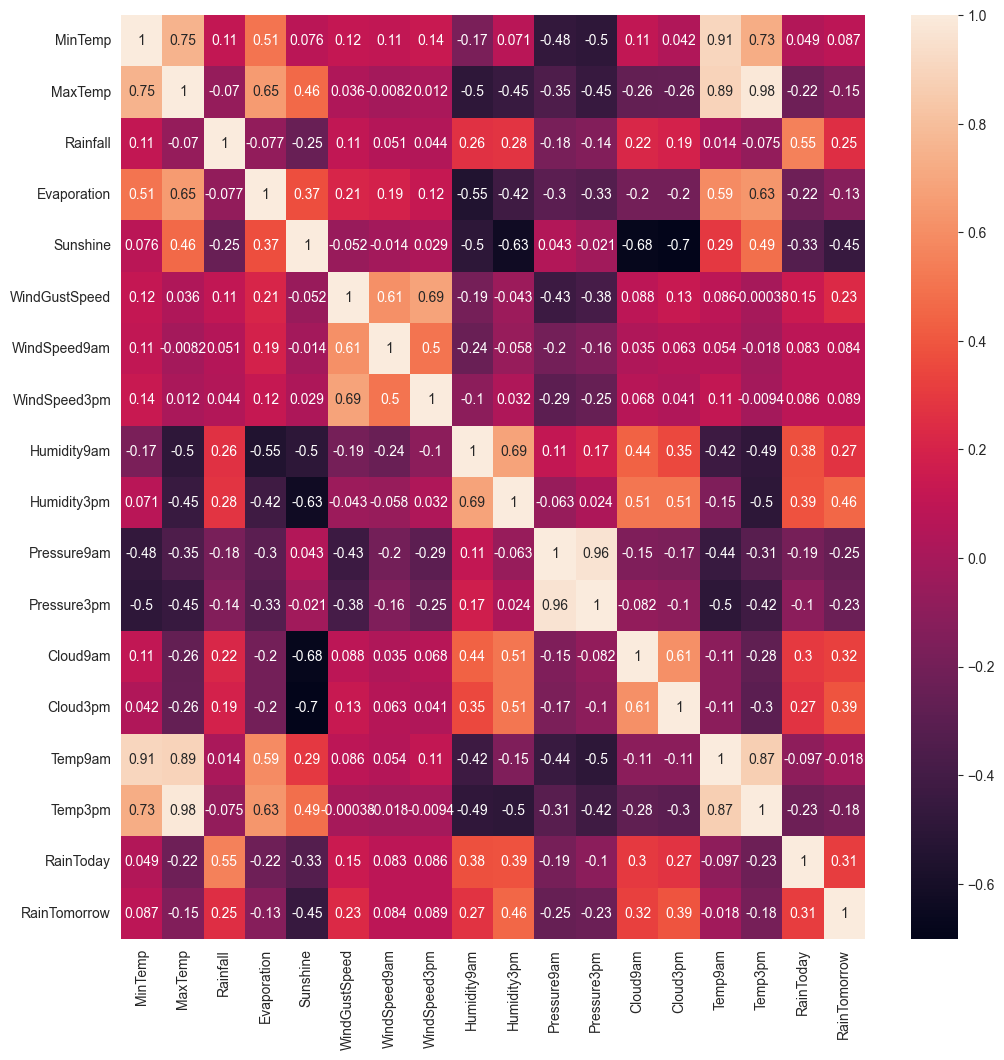

In [110]:
plt.figure(figsize = (12,12))
sns.heatmap(df_rain.corr(), annot = True)

In [111]:
predictors_col = [col for col in df_rain.columns if col != 'RainTomorrow']

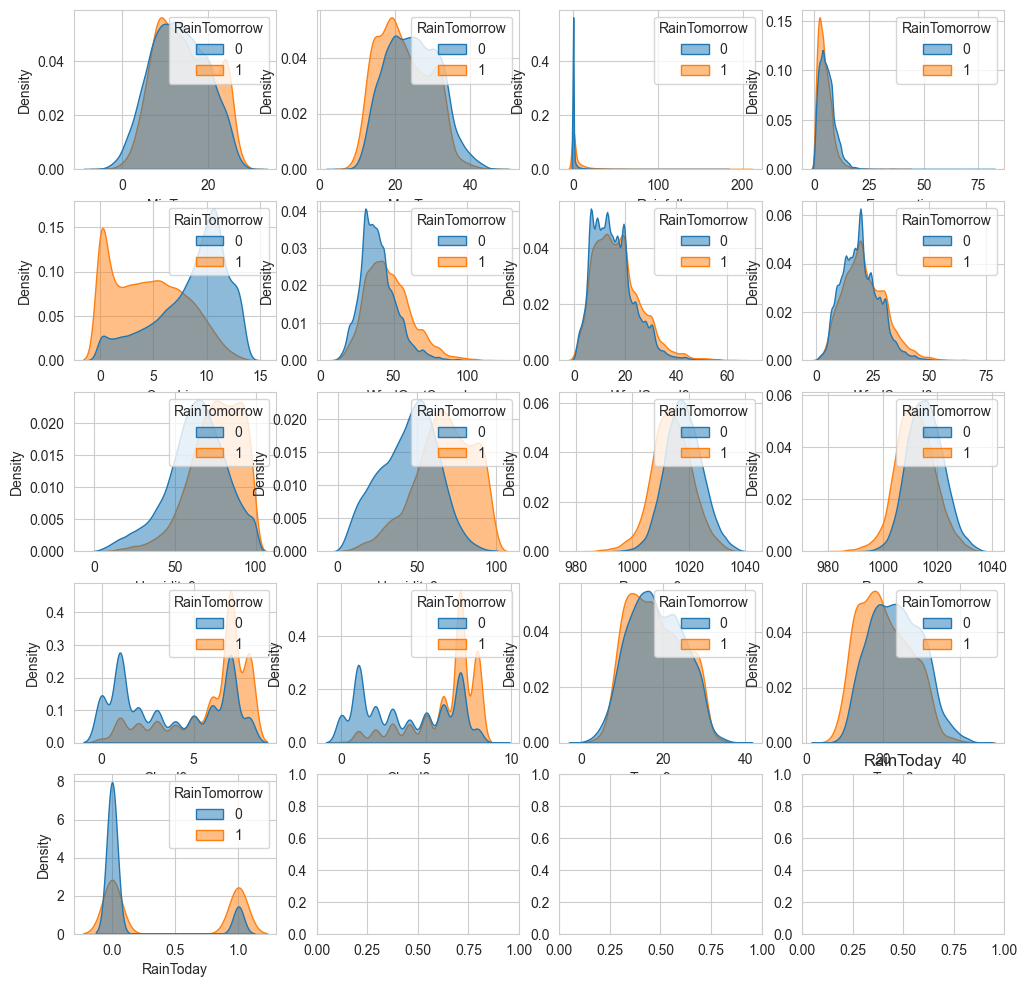

In [112]:
n_rows=5
n_cols=4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (12,12))
for k,col in enumerate(predictors_col):
    plt.title(col)
    sns.kdeplot(
                data=df_rain,
                x=col,
                hue="RainTomorrow",
                fill=True, 
                common_norm=False,
                alpha=.5,
                linewidth=1,
                ax=axes[k//n_cols,k%n_cols]
    )
    
plt.show()

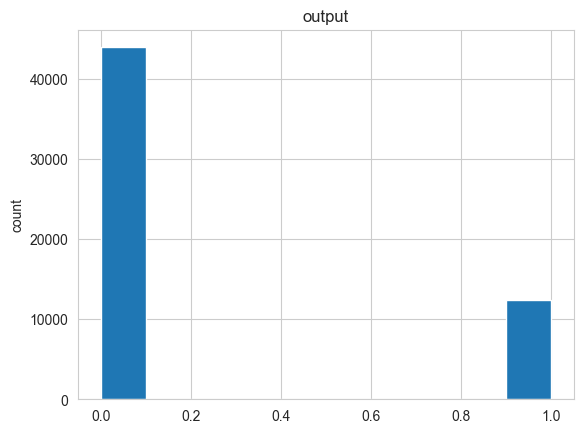

In [113]:
plt.hist(df_rain.RainTomorrow)
plt.title("output")
plt.ylabel("count")
plt.show()

## V.5) Trying models on the dataset

In [114]:
X,y = df_rain[predictors_col], df_rain["RainTomorrow"]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


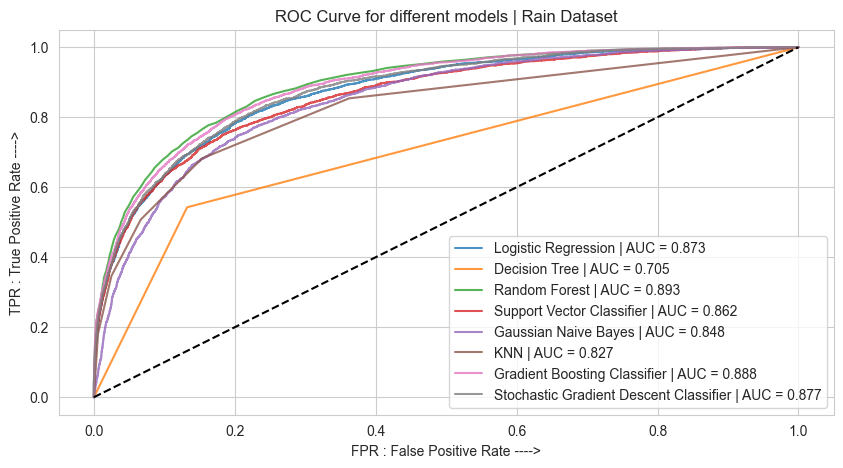

In [115]:
plt.figure(figsize = (10,5))
for model_name, model_constructor in classifier_models.items():
    model = model_constructor.fit(X_train, y_train)
    if hasattr(model,"decision_function"):
        y_score = model.decision_function(X_test)
    elif hasattr(model,"predict_proba"):
         y_score = model.predict_proba(X_test)[:,1]
    else:
        print("error")
        
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(
            fpr,
            tpr,
            linestyle = '-',
            label = f"{model_name} | AUC = {round(roc_auc,3)}",
            alpha = 0.8
        )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR : False Positive Rate ---->")
plt.ylabel("TPR : True Positive Rate ---->")
plt.title("ROC Curve for different models | Rain Dataset")
plt.legend()
plt.show()

Due to too much rows, we won't draw a learning curve for this dataset 

It seems that all models performs very well on this dataset. Which make it relevant to work on 

# VI - The sixth dataset : Mobile Price Classification

In [116]:
df_mobile = pd.read_csv("datasets/mobile_price_classification/train.csv")

In [117]:
df_mobile.head(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   
5        164        1  ...       1004      1654  1067    17     1         10   
6        139        8  ...        381      1018  3220    13     8         18   
7        187        4  ...        512      1149   700    16     3          5   
8        174        7  ...        386       836  1099    17     1         20   
9         93        5  ...       1137      1224   513    19    10         12   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  
5        1             0     0            1  
6        1             0     1            3  
7        1             1     1            0  
8        1             0     0            0  
9        1             0     0            0  

[10 rows x 21 columns]

In [118]:
print(f"The dataset has : \n -{df_mobile.shape[0]} rows \n -{df_mobile.shape[1]} columns")

The dataset has : 
 -2000 rows 
 -21 columns


In [119]:
print(df_mobile.columns.tolist())

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [120]:
(df_mobile.isna().sum(axis = 0)/df_mobile.shape[0] * 100).sort_values(ascending = False)

battery_power    0.0
px_height        0.0
wifi             0.0
touch_screen     0.0
three_g          0.0
talk_time        0.0
sc_w             0.0
sc_h             0.0
ram              0.0
px_width         0.0
pc               0.0
blue             0.0
n_cores          0.0
mobile_wt        0.0
m_dep            0.0
int_memory       0.0
four_g           0.0
fc               0.0
dual_sim         0.0
clock_speed      0.0
price_range      0.0
dtype: float64

no missing values

In [121]:
df_mobile.dtypes.value_counts()

int64      19
float64     2
Name: count, dtype: int64

In [122]:
for col in df_mobile.select_dtypes('float'):
    print(col)

clock_speed
m_dep


In [123]:
for col in df_mobile.select_dtypes('int'):
    print(col)

battery_power
blue
dual_sim
fc
four_g
int_memory
mobile_wt
n_cores
pc
px_height
px_width
ram
sc_h
sc_w
talk_time
three_g
touch_screen
wifi
price_range


In [124]:
df_mobile.price_range.unique()

array([1, 2, 3, 0])

In [125]:
predictors_col = [col for col in df_mobile.columns if col != 'price_range']
target_variable = 'price_range'

In [126]:
X = df_mobile[predictors_col]
y = df_mobile[target_variable]

<Axes: >

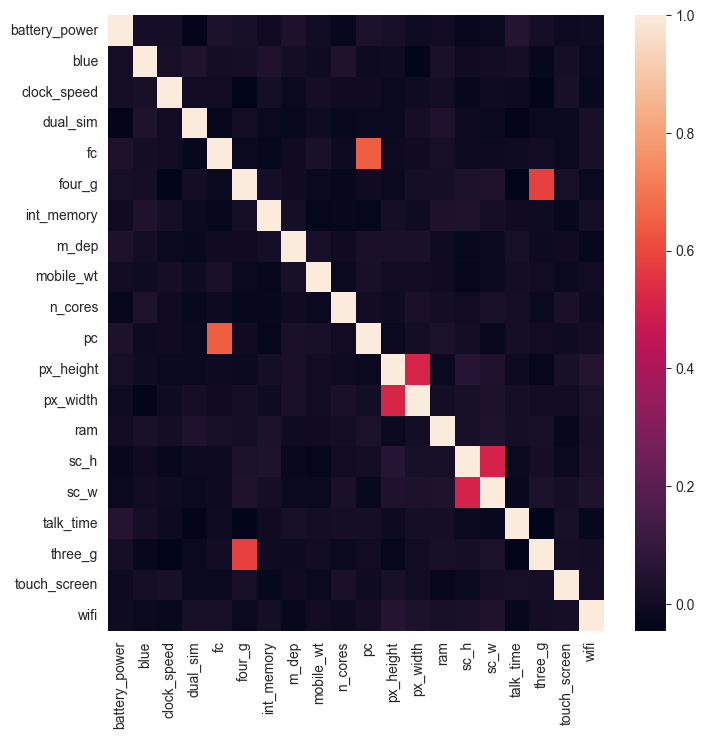

In [127]:
plt.figure(figsize = (8,8))
sns.heatmap(X.corr())

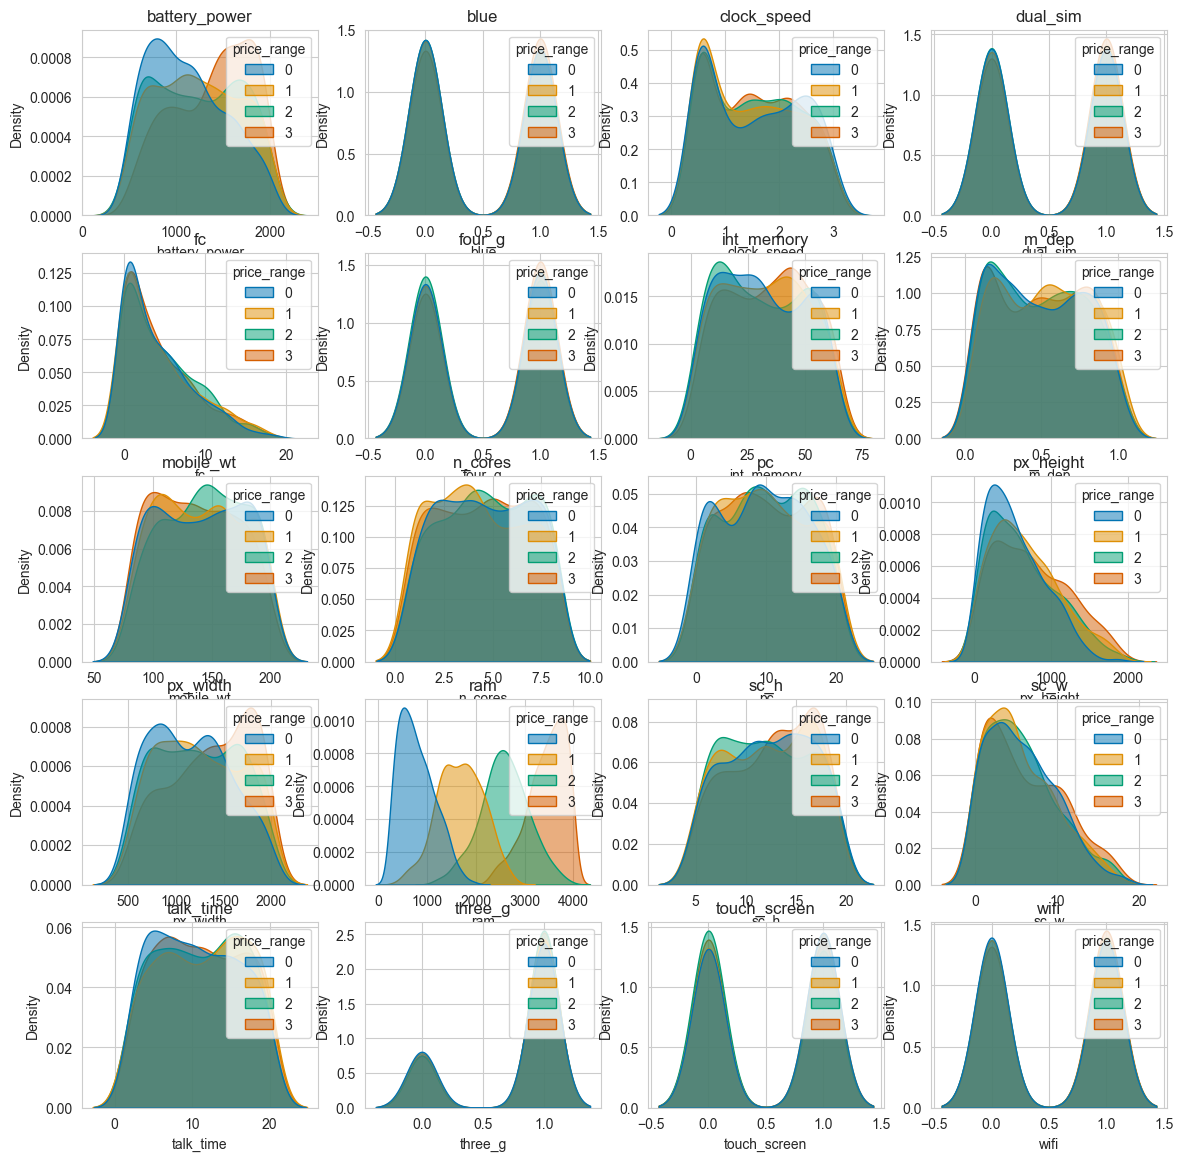

In [128]:
n_rows=5
n_cols=4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (14,14))
for k,col in enumerate(predictors_col):
    axes[k//n_cols, k%n_cols].set_title(col)
    sns.kdeplot(
                data=df_mobile,
                x=col,
                hue=target_variable,
                fill=True, 
                common_norm=False,
                palette="colorblind",
                alpha=.5,
                linewidth=1,
                ax=axes[k//n_cols,k%n_cols]
    )

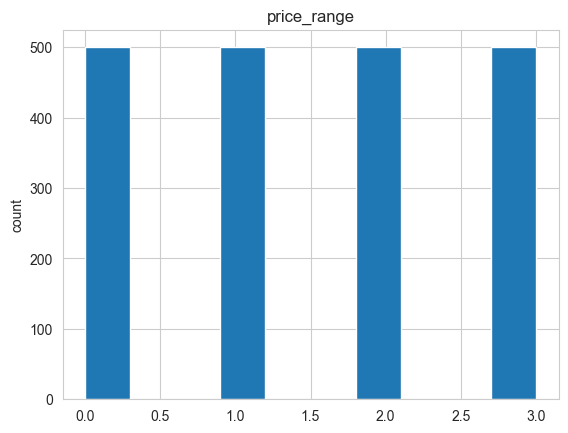

In [129]:
plt.hist(df_mobile.price_range)
plt.title("price_range")
plt.ylabel("count")
plt.show()

The classes are balanced 

This dataset is for multiclassifiaction tasks. However, so far we only did binary classification. As the classes have a meaning and their values are ordered, we can "make" two new classes according to the following mapping : 0 or 1 -> 0 and 2 or 3 -> 1 
This is not the best thing to do but it's a good proxy to test something 

In [130]:
df_mobile["price_range"] = np.where((df_mobile.price_range == 0) | (df_mobile.price_range == 1), 0, 1)

In [131]:
df_mobile.price_range

0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64

In [132]:
X = df_mobile[predictors_col]
y = df_mobile[target_variable]

<Axes: >

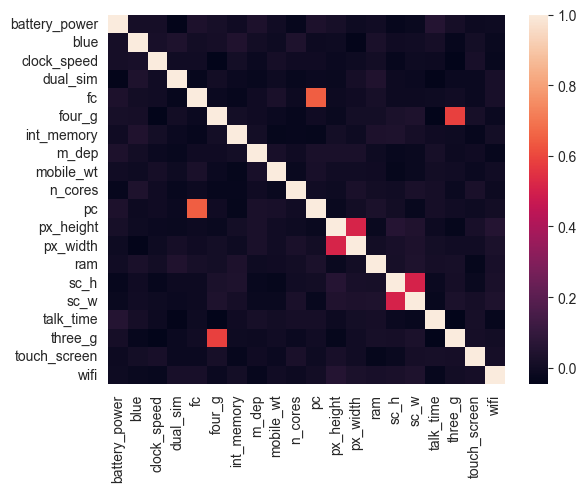

In [133]:
sns.heatmap(X.corr())

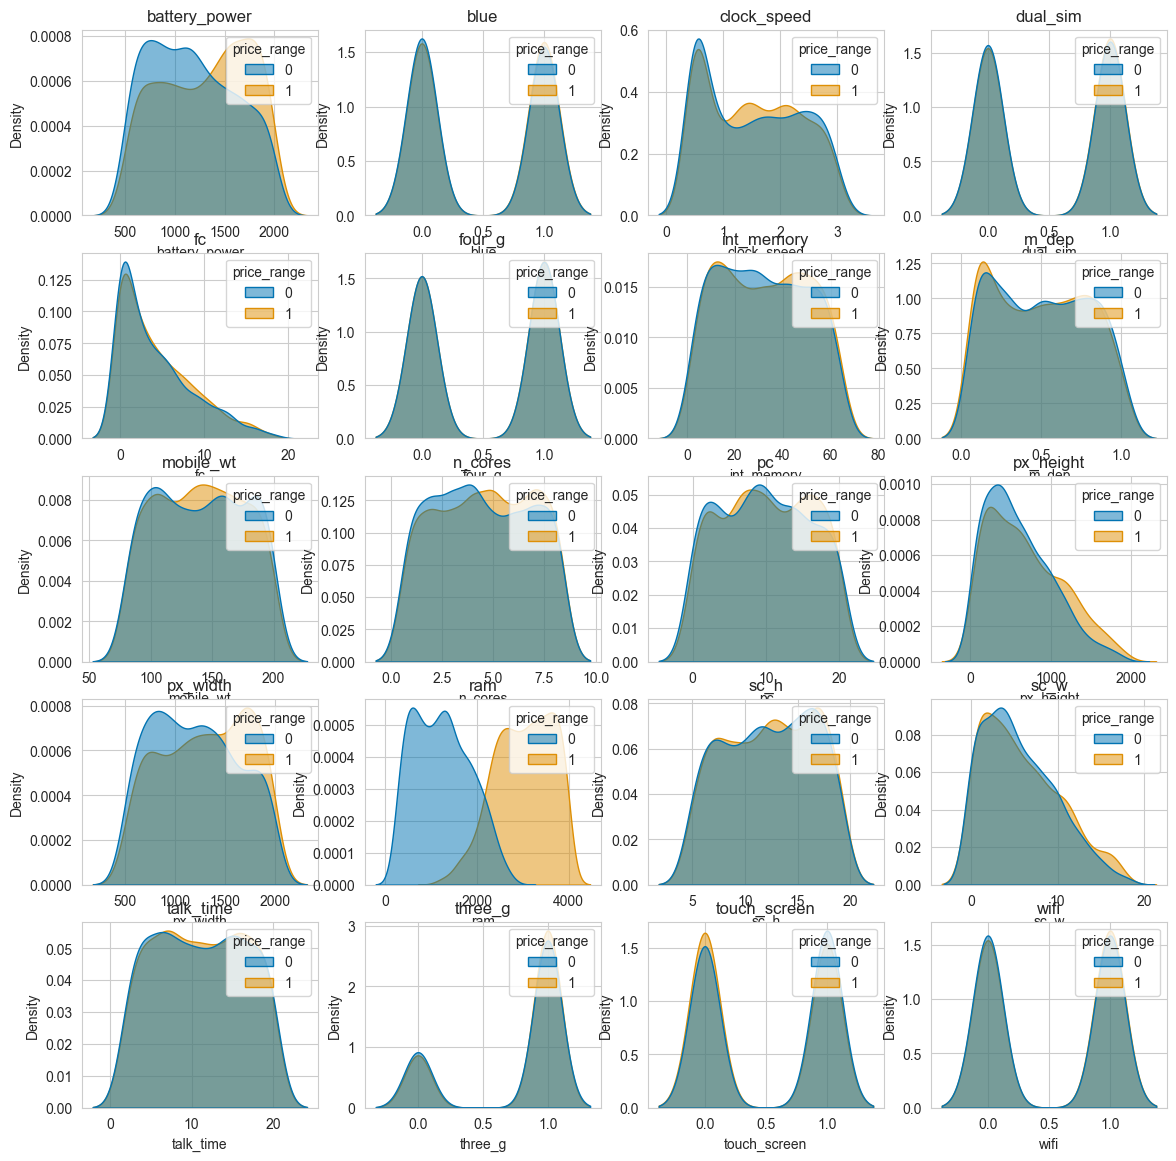

In [134]:
n_rows=5
n_cols=4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (14,14))
for k,col in enumerate(predictors_col):
    axes[k//n_cols, k%n_cols].set_title(col)
    sns.kdeplot(
                data=df_mobile,
                x=col,
                hue=target_variable,
                fill=True, 
                common_norm=False,
                palette="colorblind",
                alpha=.5,
                linewidth=1,
                ax=axes[k//n_cols,k%n_cols]
    )

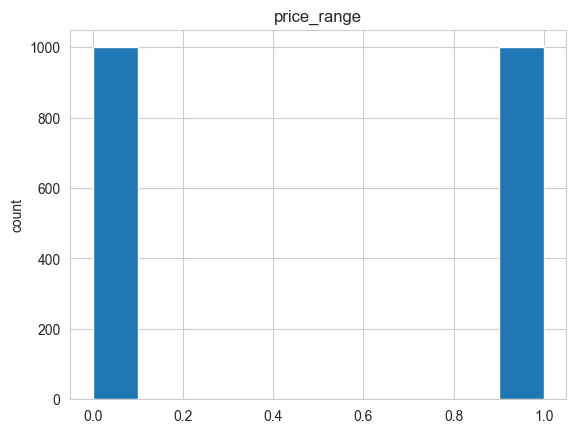

In [135]:
plt.hist(df_mobile.price_range)
plt.title("price_range")
plt.ylabel("count")
plt.show()

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


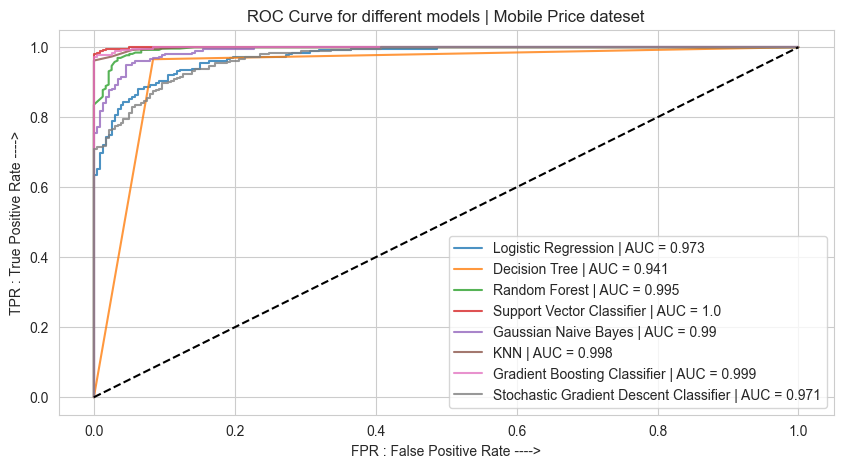

In [137]:
plt.figure(figsize = (10,5))
for model_name, model_instance in classifier_models.items():
    model = model_instance.fit(X_train, y_train)
    if hasattr(model,"decision_function"):
        y_score = model.decision_function(X_test)
    elif hasattr(model,"predict_proba"):
         y_score = model.predict_proba(X_test)[:,1]
    else:
        print("error")
        
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(
            fpr,
            tpr,
            linestyle = '-',
            label = f"{model_name} | AUC = {round(roc_auc,3)}",
            alpha = 0.8
        )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR : False Positive Rate ---->")
plt.ylabel("TPR : True Positive Rate ---->")
plt.title("ROC Curve for different models | Mobile Price dateset")
plt.legend()
plt.show()

/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/imadbda/PycharmProjects/MachineLearning_Zero_to_Hero/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

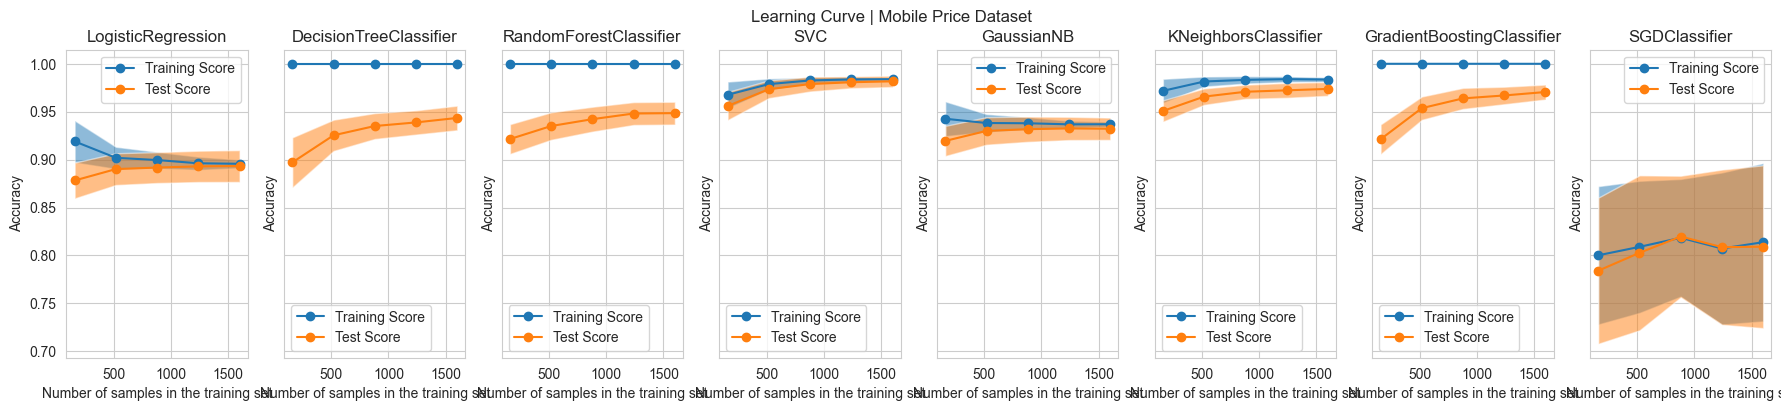

In [138]:
common_params = {
    "X" : X.values,
    "y" : y.values,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fig, ax = plt.subplots(nrows=1, ncols=len(classifier_models.keys()), figsize=(22, 4), sharey=True)
fig.suptitle("Learning Curve | Mobile Price Dataset")

for ax_idx, estimator in enumerate(classifier_models.values()):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"{estimator.__class__.__name__}")

# VII - The seventh dataset : mushroom classification

In [139]:
df_mushroom = pd.read_csv("datasets/mushrooms/mushrooms.csv")

In [140]:
df_mushroom.head(10)

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   
5     e         x           y         y       t    a               f   
6     e         b           s         w       t    a               f   
7     e         b           y         w       t    l               f   
8     p         x           y         w       t    p               f   
9     e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   
5            c         b          n  ...                        s   
6            c         b          g  ...                        s   
7            c         b          n  ...                        s   
8            c         n          p  ...                        s   
9            c         b          g  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   
5                      w                      w         p          w   
6                      w                      w         p          w   
7                      w                      w         p          w   
8                      w                      w         p          w   
9                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  
5           o         p                 k          n       g  
6           o         p                 k          n       m  
7           o         p                 n          s       m  
8           o         p                 k          v       g  
9           o         p                 k          s       m  

[10 rows x 23 columns]

In [141]:
print(f"The dataset has : \n -{df_mushroom.shape[0]} rows \n -{df_mushroom.shape[1]} columns")

The dataset has : 
 -8124 rows 
 -23 columns


In [142]:
print(df_mushroom.columns.tolist())

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [143]:
(df_mushroom.isna().sum(axis = 0)/df_mushroom.shape[0] * 100).sort_values(ascending = False)

class                       0.0
stalk-surface-above-ring    0.0
population                  0.0
spore-print-color           0.0
ring-type                   0.0
ring-number                 0.0
veil-color                  0.0
veil-type                   0.0
stalk-color-below-ring      0.0
stalk-color-above-ring      0.0
stalk-surface-below-ring    0.0
stalk-root                  0.0
cap-shape                   0.0
stalk-shape                 0.0
gill-color                  0.0
gill-size                   0.0
gill-spacing                0.0
gill-attachment             0.0
odor                        0.0
bruises                     0.0
cap-color                   0.0
cap-surface                 0.0
habitat                     0.0
dtype: float64

no missing values

In [144]:
df_mushroom.dtypes.value_counts()

object    23
Name: count, dtype: int64

In [145]:
df_mushroom["class"] = np.where(df_mushroom["class"] == "p", 0, 1)

Something interesting here is that every feature is categorical. Therefore to be sure that our model can understand it, the laziest thing we can do is one hot encode the variables

In [146]:
df_mushroom_one_hot = df_mushroom.copy(deep = True)
target_variable = "class"
categorical_variables = [col for col in df_mushroom.select_dtypes(["object"]) if col != target_variable]

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_mushroom[categorical_variables])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_variables))

one_hot_df.reset_index(drop=True, inplace=True)
df_mushroom_one_hot.reset_index(drop=True, inplace=True)

df_mushroom_one_hot = pd.concat([df_mushroom_one_hot, one_hot_df], axis=1)
df_mushroom_one_hot.drop(categorical_variables, axis=1, inplace=True)

In [147]:
print(f"shape before one hot : {df_mushroom.shape}")
print(f"shape after one hot : {df_mushroom_one_hot.shape}")

shape before one hot : (8124, 23)
shape after one hot : (8124, 118)


In [148]:
df_mushroom_one_hot.head(10)

class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0      0          0.0          0.0          0.0          0.0          0.0   
1      1          0.0          0.0          0.0          0.0          0.0   
2      1          1.0          0.0          0.0          0.0          0.0   
3      0          0.0          0.0          0.0          0.0          0.0   
4      1          0.0          0.0          0.0          0.0          0.0   
5      1          0.0          0.0          0.0          0.0          0.0   
6      1          1.0          0.0          0.0          0.0          0.0   
7      1          1.0          0.0          0.0          0.0          0.0   
8      0          0.0          0.0          0.0          0.0          0.0   
9      1          1.0          0.0          0.0          0.0          0.0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  ...  \
0          1.0            0.0            0.0            1.0  ...   
1          1.0            0.0            0.0            1.0  ...   
2          0.0            0.0            0.0            1.0  ...   
3          1.0            0.0            0.0            0.0  ...   
4          1.0            0.0            0.0            1.0  ...   
5          1.0            0.0            0.0            0.0  ...   
6          0.0            0.0            0.0            1.0  ...   
7          0.0            0.0            0.0            0.0  ...   
8          1.0            0.0            0.0            0.0  ...   
9          0.0            0.0            0.0            1.0  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0           1.0           0.0           0.0        0.0        0.0        0.0   
1           0.0           0.0           0.0        0.0        1.0        0.0   
2           0.0           0.0           0.0        0.0        0.0        0.0   
3           1.0           0.0           0.0        0.0        0.0        0.0   
4           0.0           0.0           0.0        0.0        1.0        0.0   
5           0.0           0.0           0.0        0.0        1.0        0.0   
6           0.0           0.0           0.0        0.0        0.0        0.0   
7           1.0           0.0           0.0        0.0        0.0        0.0   
8           0.0           1.0           0.0        0.0        1.0        0.0   
9           1.0           0.0           0.0        0.0        0.0        0.0   

   habitat_m  habitat_p  habitat_u  habitat_w  
0        0.0        0.0        1.0        0.0  
1        0.0        0.0        0.0        0.0  
2        1.0        0.0        0.0        0.0  
3        0.0        0.0        1.0        0.0  
4        0.0        0.0        0.0        0.0  
5        0.0        0.0        0.0        0.0  
6        1.0        0.0        0.0        0.0  
7        1.0        0.0        0.0        0.0  
8        0.0        0.0        0.0        0.0  
9        1.0        0.0        0.0        0.0  

[10 rows x 118 columns]

In [149]:
predictors_col = [col for col in df_mushroom_one_hot.columns.tolist() if col != target_variable]
X,y = df_mushroom_one_hot[predictors_col], df_mushroom_one_hot[target_variable]

In [150]:
X

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0             0.0          0.0          0.0          0.0          0.0   
1             0.0          0.0          0.0          0.0          0.0   
2             1.0          0.0          0.0          0.0          0.0   
3             0.0          0.0          0.0          0.0          0.0   
4             0.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
8119          0.0          0.0          0.0          1.0          0.0   
8120          0.0          0.0          0.0          0.0          0.0   
8121          0.0          0.0          1.0          0.0          0.0   
8122          0.0          0.0          0.0          1.0          0.0   
8123          0.0          0.0          0.0          0.0          0.0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0             1.0            0.0            0.0            1.0            0.0   
1             1.0            0.0            0.0            1.0            0.0   
2             0.0            0.0            0.0            1.0            0.0   
3             1.0            0.0            0.0            0.0            1.0   
4             1.0            0.0            0.0            1.0            0.0   
...           ...            ...            ...            ...            ...   
8119          0.0            0.0            0.0            1.0            0.0   
8120          1.0            0.0            0.0            1.0            0.0   
8121          0.0            0.0            0.0            1.0            0.0   
8122          0.0            0.0            0.0            0.0            1.0   
8123          1.0            0.0            0.0            1.0            0.0   

      ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0     ...           1.0           0.0           0.0        0.0        0.0   
1     ...           0.0           0.0           0.0        0.0        1.0   
2     ...           0.0           0.0           0.0        0.0        0.0   
3     ...           1.0           0.0           0.0        0.0        0.0   
4     ...           0.0           0.0           0.0        0.0        1.0   
...   ...           ...           ...           ...        ...        ...   
8119  ...           0.0           0.0           0.0        0.0        0.0   
8120  ...           0.0           1.0           0.0        0.0        0.0   
8121  ...           0.0           0.0           0.0        0.0        0.0   
8122  ...           0.0           1.0           0.0        0.0        0.0   
8123  ...           0.0           0.0           0.0        0.0        0.0   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0           0.0        0.0        0.0        1.0        0.0  
1           0.0        0.0        0.0        0.0        0.0  
2           0.0        1.0        0.0        0.0        0.0  
3           0.0        0.0        0.0        1.0        0.0  
4           0.0        0.0        0.0        0.0        0.0  
...         ...        ...        ...        ...        ...  
8119        1.0        0.0        0.0        0.0        0.0  
8120        1.0        0.0        0.0        0.0        0.0  
8121        1.0        0.0        0.0        0.0        0.0  
8122        1.0        0.0        0.0        0.0        0.0  
8123        1.0        0.0        0.0        0.0        0.0  

[8124 rows x 117 columns]

In [151]:
y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

<Axes: >

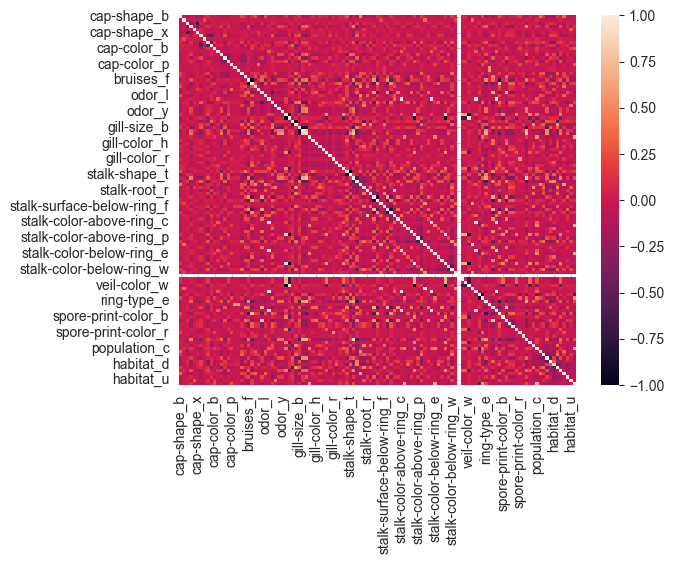

In [152]:
sns.heatmap(X.corr())

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

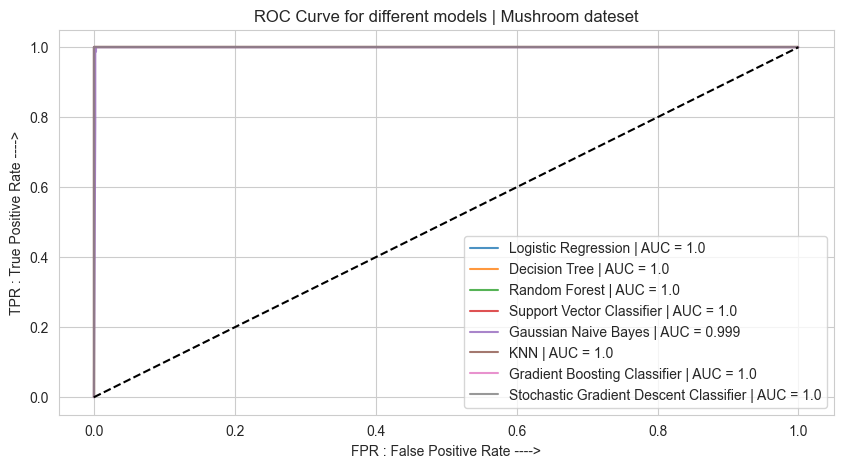

In [154]:
plt.figure(figsize = (10,5))
for model_name, model_instance in classifier_models.items():
    model = model_instance.fit(X_train, y_train)
    if hasattr(model,"decision_function"):
        y_score = model.decision_function(X_test)
    elif hasattr(model,"predict_proba"):
         y_score = model.predict_proba(X_test)[:,1]
    else:
        print("error")
        
    fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(
            fpr,
            tpr,
            linestyle = '-',
            label = f"{model_name} | AUC = {round(roc_auc,3)}",
            alpha = 0.8
        )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR : False Positive Rate ---->")
plt.ylabel("TPR : True Positive Rate ---->")
plt.title("ROC Curve for different models | Mushroom dateset")
plt.legend()
plt.show()

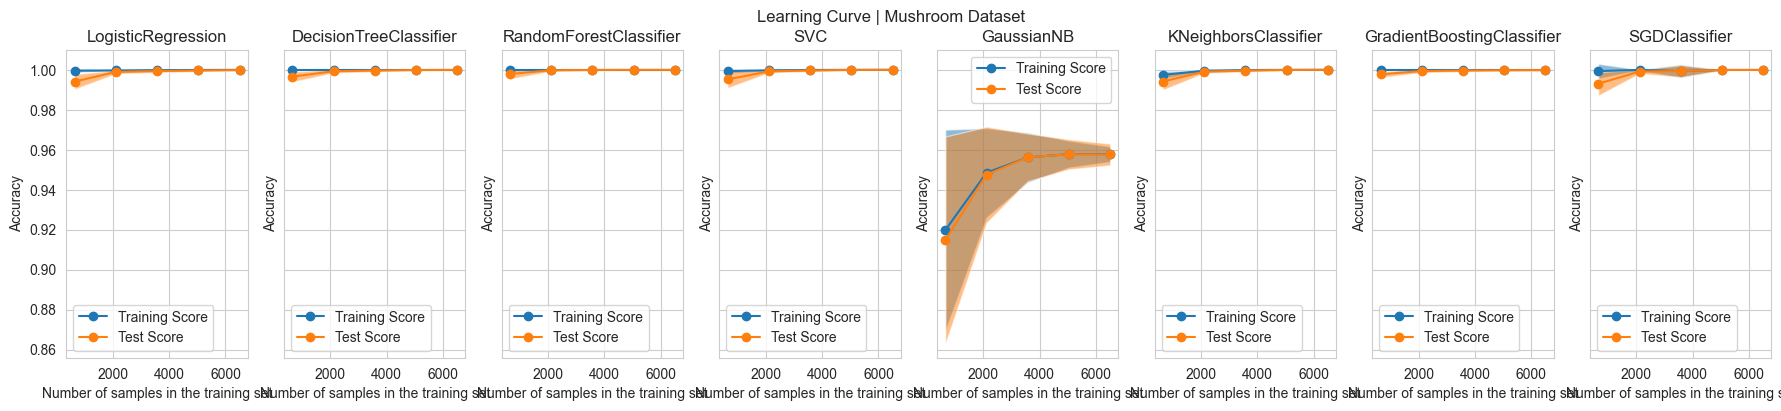

In [155]:
common_params = {
    "X" : X.values,
    "y" : y.values,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

fig, ax = plt.subplots(nrows=1, ncols=len(classifier_models.keys()), figsize=(22, 4), sharey=True)
fig.suptitle("Learning Curve | Mushroom Dataset")

for ax_idx, estimator in enumerate(classifier_models.values()):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"{estimator.__class__.__name__}")